- 2021년 05월 26일 수요일
- 영우 글로벌 러닝
- K-digital 핵심 실무인재 양성과정
- 데이터 기반 인공지능 시스템 엔지니어 양성과정 3기
- 작성자: 4조 이승은 (발표 부분은 성능향상 기법 앙상블과 정리)

### 데이콘
- 구글에서 운영하는 캐글처럼 데이터를 제공해 토론(해커톤)과 경진대회를 주최하고 있다. 
    - 해커톤: 데이터셋을 제공하고 토론하는 형식
    - 경진대회: 금융, 스포츠, 기상, 지구과학 등 다양한 분야의 각기 다른 종류의 데이터를 가지고 참여자마다 다양한 방식으로 주어진 문제를 해결한다. 
- 대회마다 정해진 평가척도를 통해 순위를 결정하고, 우승자에게는 대회 결과에 따라 상금 및 대회 특전을 부여한다.

# 4. 상점 신용카드 매출 예측
목차
1. 문제 정의
2. 데이터 전처리
3. 탐색적 데이터 분석
4. 모델 구축과 검증
5. 성능 향상을 위한 방법
6. 정리

## 4.1. 문제 정의

### 4.1.1. 경진대회 소개
- __문제__: 2016년 6월 1일부터 2019년 2월 28일까지 총 2년 8개월 가량의 신용카드 매출 데이터를 가지고 2019년 3월 1일부터 2019년 5월 31일까지의 상점별 3개월 총매출을 예측
- __주의할 점__: 3개월의 시간.
    - 3,4,5월은 봄이라는 계절을 의미, 새 학기에 접어든 학생들로 인해 여러 변수가 발생하고 황사 등 날씨의 영향을 받을 수 있으며, 5월 가정의 달이 일반적인 상점에게는 성수기에 속한다는 부분이 있다.
- __핵심__: 상점별 3~5월의 매출 총합을 예측하는 것


- 참고
- 핀테크 기업인 'FUNDA(펀다)'는 상환 기간의 매출을 예측하여 신용 점수가 낮거나 담보를 가지지 못하는 우수 상점들에 금융 기회를 제공하려 한다. 데이콘 제 1회 펀다 대출 상점 총매출 예측 경진대회도 비슷했다.
    - 전통적인 금융권은 소상공인 대출 시 신용점수 또는 담보물 위주의 평가를 진행, 상환 기간의 매출을 예측해 신용 점수가 낮거나 담보가 없는 우수 상점에 금융 기회를 제공하려 한다. 대출 상점 총매출 예측 경진대회는 상환 기간의 '총매출'을 예측하는 모델을 만드는 것이다. 예측된 매출을 기반으로 대출 한도를 설정함. 모델이 정확할수록 더 낮은 금리와 더 높은 한도를 제공함.

### 마크다운으로 수식 입력 (LaTex)
- https://iot-lab.tistory.com/150
- https://en.wikipedia.org/wiki/Help:Displaying_a_formula#Formatting_using_TeX

### 4.1.2. 평가척도
데이터
- funda_train.csv: 458MB, 6,556,613행 9열의 데이터 중 1,967개 상점의 매출을 예측
- submission.csv: 1,967개 상점의 3개월 매출 총합을 예측

평가 척도: __MAE__(Mean Absolute Error, 평균절대오차)
- __MAE__ = $\frac{1}{n} $$\sum_{i=1}^n $$\vert y_{i} - y_{i}' \vert$
- 실제값과 예측값의 차이에 절대값을 취하고 평균값을 계산한 손실함수
- 손실의 크기를 그대로 반영하므로 이번 상점 매출예측대회의 평가 척도로 사용됐다.


- 예시:
    - 상점1과 상점2의 실제 매출이 100만 원, 80만 원이고, 예측 모델은 상점1의 매출을 95만 원, 상점2의 매출은 70만 원으로 예측했다고 가정, 각 상점의 실제값과 예측값의 차이의 절대값은 각각 5만 원과 10만 원이고 평균값은 7만5천 원인데, 여기서 7만5천 원이 MAE 값이다. 
    
    
- __MAE__ 추가 설명:
    - 예측값과 실제값이 떨어진 정도의 절대값을 평균낸 것이기에, 전체 데이터의 학습된 정도를 쉽게 파악할수 있다. 또한 절대값 사용으로 차이값의 변동이 심하지 않기에, 이상값 및 에러값에 크게 영향 받지 않는다.
    - 단점으로는 절대값을 취하기에 해당 예측이 어느 식으로 오차가 발생했는지, 음수인지 양수인지에 대해 방향성을 상실한다. [MSE 및 MAE 공부](https://wiserloner.tistory.com/1041)
    - MAE는 회귀지표로써 사용된다. [MSE와 MAE의 차이](https://m.blog.naver.com/heygun/221516529668)

|#|코드 평가 항목|
|-----|:-----|
|1|주어진 데이터를 정제하는 과정|
|2|추론 시 사용할 변수 구축 및 선택 과정|
|3|모델 선택 및 정규화 과정|
|4|최적화 과정|

### 4.1.3. 대회 관련 사전 조사
__사전 조사__: 
- 대회에 관련하여 필요한 논문이나 법률, 해당 분야의 지식 등을 조사하고, 조사한 내용을 바탕으로 데이터에 접근해 데이터 전처리, 변수 생성, 모델 사용까지 이루어진다. 따라서 해당 조사 과정에서 다양한 방법으로 정보를 수집하고 정보를 활용해야 한다.

#### # 참고하면 좋을 사이트
- [예측 교과서](https://otexts.com/fppkr/) (통계학)
- [계량 경제학, 강기준 저](http://kanggc.iptime.org/em/kanggc.pdf): 200쪽부터
    - 해당 사이트: http://kanggc.iptime.org/em/em.html
- 그 외 김창진 교수님의 계량 경제학 강의 노트

__도메인 조사 정리__:
크게 3 가지로 분류했다.
1) __자영업자__
- 상점을 운영하는 사람으로, 많은 상황을 고려하게 한다.
- 상점의 매출은 상점이 운영되는 시기(주중·주말, 공휴일 여부, 오전·오후·심야, 4계절, 학기·방학)와 관련된 상황과 자영업자의 상황(리모델링, 계약, 휴폐업)에 따라 움직인다.

|파생 변수|변수 가능성 설명|
|:-----|:-----|
|평일·주말 매출|주말에 매출이 높다는 가정하에 평일과 주말 매출을 비교해 차이 여부를 확인|
|계절별 4분기 매출|결과 제출의 계절이 봄이므로 사계절 중 봄 매출액이 차지하는 비중을 확인|
|시간대별 매출|하루를 여러 시간대로 나눠 매출의 차이를 확인|
|학기로 나눈 4분기 매출|학기로 나누면 성수기, 특정 시점 매출 등 여러 상황을 유발할 수 있어 매출의 차이를 확인|
|공휴일 변수 여부|평일에 있는 공휴일은 평소와 다른 양상을 보이므로 확인 요함|
|개업·휴업·폐업에 따른 변수|개업 전에 매출이 없는 상점, 휴업으로 인해 특정 시점의 매출이 없는 상점, 폐업으로 인해 매출이 사라진 상점을 파악하고 최종 결과에 영향이 있을 상점을 확인|

2) __카드사 직원__
- 카드사에서 정한 다양한 결제 방식 고려: 할부, 포인트, 현금 사용, 환불·재결제 등
    - 환불의 경우: 매출액 감소하며 거래 건수는 증가함으로 확인 요함
    - 직원·고객의 실수로 재결제 할 경우
    - 할부 결제의 경우 매출액의 표기 시점을 어떻게 정의하느냐
    
    
- 개인적으로 할부 결제 시점 판단 여부를 생각지도 못했다. 도메인 조사 중 여러 파생 변수에 대해 고려할 것을 유의해야 할 것 같다.

|파생 변수|변수 가능성 설명|
|-----|:-----|
|포인트 적립·사용 여부|포인트 사용 할인이나 포인트 사용 결제 등 예기치 못한 변수들을 차단해 단순한 모델을 만들어야 하므로 이 항목은 확인 요함|
|할부 사용 여부|결제 금액이 매출로 잡히는 시점을 판단해야 단순한 모델링이 가능. 시점 정의 요함|
|현금 사용 여부|카드 매출액과는 연관이 없지만, 상점에서 세금 등의 문제로 의도치 않은 데이터가 존재할 수 있기에 확인 요함|
|환불·재결제 여부|환불은 사용 건수는 오르지만 매출액은 감소하기에 추후 최종 예측 단계에서 부정확한 예측을 일으키고, 재결제 역시 같은 맥락이므로 꼭 제거하고 확인 요함|
|통신 장애 여부|카드 단말기 오류 등으로 단기간 매출액이 잡히지 않는 경우. 매출액에 영향을 주는 모든 것은 생각해볼 여지가 있기에 확인 요함|

3) __고객__
- 매출을 발생시킴: 꾸준한 결제, 특수 결제 상황, 계절에 따른 결제 상황, 월급날 전후 결제 상황, 경제적 여유 등
    - 꾸준한 결제: 생활에서 항상 반복하는 루틴. 교통비, 식사비, 커피 구매비 등
    - 경제적 여유: 경제적으로 어려워지면 상점 매출 감소할 것
    - 그 외: 취미나 취향에 따라 결정되는 결제 상황

|파생 변수|변수 가능성 설명|
|-----|:-----|
|평상시 결제(기본 유지비)| 기본으로 사용하는 금액, 꾸준하고 완만한 그래프를 보여주는 매출액. 상점 매출액의 기본이 되는 항목|
|평소와 다른 결제 상황(예상치 못한 소비)|해당 매출액은 내외부 변수에 민감하고 변동이 심해서 매출액의 흐름을 다양한 방향에서 확인|
|고객 성향에 따른 상황|돈을저축하거나 저축하지 않는 두 성향의 고객에 따른 매출액 변화 확인 요함|
|월급날 기준 근처 결제 상황|월급날을 기준으로 1~2주간 많은 소비를 하지만, 월급날 직전 일주일은 소비를 최소화함. 매출액 변화에 영향을 끼칠 변수들은 확인 요함|
|경제적 여유에 따른 결제 상황|경제적으로 풍족한 고객이 많다면 매출액이 증가하지만, 반대의 경우 감소함. 외부 자료를 통해 확인 요함|
|국가경제지표에 따른 결제 상황|경제 성장률, 소비자 물가 지수, 주식 종합 지수, 빅맥 지수, 스타벅스 지수 등 세상에는 국가 경제를 확인할 수 있는 지표들이 정말 다양하게 많이 존재함. 외부 자료를 수집해 예측할 시점의 상황을 예측하고 그에 따른 고객들의 소비 성향을 확인해 예측 정확도를 높일 수 있으므로 __반드시__ 확인 요함|

### 4.1.4. 문제 해결을 위한 접근 방식 소개
대회에서 제공한 데이터로 상점의 매출을 예측하기 위해서는 데이터에 대한 정확한 이해가 필요하다. 따라서 제공된 데이터의 속성에 대한 특징을 파악하기 위해 데이터를 살펴보고 신용카드 매출 데이터에 존재하는 노이즈를 알아보고 분석 방향을 다룬다.


#### # 데이터 살펴보기
__시계열 데이터__ : 일정한 시간동안 수집된 일련의 순차적으로 정해진 데이터 셋의 집합으로 시간에 관해 순서가 매겨져 있다는 점과, 연속한 관측치는 서로 상관관계를 갖고 있다. 즉, 시계열이 갖고 있는 법칙성을 발견해 이를 모델링하고, 추정된 모델을 통하여 미래의 값을 예측한다.


- 관측치가 시간의 순서를 가진 데이터다. 'A라는 시간에 B라는 고객이 C라는 제품을 구매했다'는 정보로, 고객 B에 대한 다양한 정보(성별, 나이, 혼인 여부, 거주 지역, 고객 등급, 국적, 자주 구매하는 제품군)과 제품 C에 대한 다양한 정보(제품의 분류, 가격, 특징, 인기도 등)가 들어 있다. 


##### 작업 디렉터리
- 데이터를 가공하고 새로운 변수를 생성하거나 파일의 크기, 이름 등을 편하게 변경하면서 사용하므로 작업 시간을 단축하기 위해 작업 디렉토리 환경을 조성해 준다.
- 초기 학습 데이터를 가져오고 전처리 및 탐색적 데이터 분석(EDA 분석)이 완료된 데이터를 작업을 수행할 때마다 불러오는 시간도 단축하고, 제출 파일의 여러 버전을 저장하므로 정리된 공간에서 작업하는 것이 효율적이다.

In [1]:
# 경고 메세지 숨기기
import warnings
warnings.filterwarnings("ignore") 

# 작업 디렉터리 설정할 것
import os 
os.chdir('D:/data lab/9. Dacon/ch04') 

# csv 데이터 불러오기
import pandas as pd 
train = pd.read_csv('./funda_train.csv')
submission = pd.read_csv('./submission.csv')

- os.chdir(): 설정하고 싶은 작업 경로를 인자로 넘겨주면 작업 디렉터리를 변경할 수 있다.
- pd.read_csv(): csv 데이터 불러오기

In [2]:
# 데이터 크기 확인
train.shape
# 학습 데이터는 총 6,556,613개(행)이며, 상점마다 9개의 변수 존재

(6556613, 9)

In [3]:
# 데이터 첫 5줄 확인
train.head()

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business,amount
0,0,0,b,2016-06-01,13:13,0,NaN,기타 미용업,1857.142857
1,0,1,h,2016-06-01,18:12,0,NaN,기타 미용업,857.142857
2,0,2,c,2016-06-01,18:52,0,NaN,기타 미용업,2000.000000
3,0,3,a,2016-06-01,20:22,0,NaN,기타 미용업,7857.142857
4,0,4,c,2016-06-02,11:06,0,NaN,기타 미용업,2000.000000


In [4]:
# 데이터 알아보기
train.info()
# 데이터의 크기와 각 속성의 타입 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6556613 entries, 0 to 6556612
Data columns (total 9 columns):
store_id            int64
card_id             int64
card_company        object
transacted_date     object
transacted_time     object
installment_term    int64
region              object
type_of_business    object
amount              float64
dtypes: float64(1), int64(3), object(5)
memory usage: 450.2+ MB


|변수명|설명|
|-----|:-----|
|store_id|상점 고유 아이디(각 상점 식별), 1,967개의 상점|
|card_id|사용한 카드의 고유 아이디|
|card_company|비식별화된 카드 회사(카드 회사 정보 보호를 위해 비식별화됨)|
|transacted_date|거래 날짜|
|transacted_time|거래 시간(시:분)|
|installment_term|실제 할부 개월이 기재되고, 전체 매출은 거래 시간에 기록됨. 할부 개월 수(포인트 사용 시 '60개월+실제 할부 개월'을 할부 개월 수에 기재|
|region|상점의 지역|
|type_of_business|상점의 업종|
|amount|결제 금액 즉, 매출액(단위는 원이 아님 주의, 실제 단위는 알 수 없음)|

#### # 데이터의 노이즈
데이터 수집 과정에서 생기는 데이터 노이즈가 반영되어 있기에, 전처리 작업이 필요
- 결측값(NA, nan), 분포를 따르지 않는 이상치(outlier), 빈칸으로 남겨진 데이터(unkown), 사람 실수로 잘못 입력된 값, 개인정보 보호 위해 익명화된 속성 등

In [5]:
# 결측값 확인
train[:5] # 5행

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business,amount
0,0,0,b,2016-06-01,13:13,0,NaN,기타 미용업,1857.142857
1,0,1,h,2016-06-01,18:12,0,NaN,기타 미용업,857.142857
2,0,2,c,2016-06-01,18:52,0,NaN,기타 미용업,2000.000000
3,0,3,a,2016-06-01,20:22,0,NaN,기타 미용업,7857.142857
4,0,4,c,2016-06-02,11:06,0,NaN,기타 미용업,2000.000000


- region(지역) 속성에 결측값 NaN이 존재함
    - 결측값 처리 방법: 평균값 대치, 0으로 대치, 제거 등 

In [6]:
# 이상치 확인
train[train['amount']<0]

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business,amount
41,0,40,a,2016-06-10,17:26,2,NaN,기타 미용업,-8571.428571
347,0,285,a,2016-08-04,17:52,0,NaN,기타 미용업,-1857.142857
731,0,473,g,2016-10-17,10:32,0,NaN,기타 미용업,-2000.000000
831,0,230,b,2016-11-03,15:36,0,NaN,기타 미용업,-85.714286
944,0,138,a,2016-11-28,13:21,0,NaN,기타 미용업,-57.142857
...,...,...,...,...,...,...,...,...,...
6556242,2136,4663626,b,2019-02-01,21:19,0,제주 제주시,기타 주점업,-13428.571429
6556448,2136,4663760,d,2019-02-15,00:46,0,제주 제주시,기타 주점업,-6928.571429
6556485,2136,4663779,b,2019-02-18,02:45,0,제주 제주시,기타 주점업,-5571.428571
6556489,2136,4663780,d,2019-02-18,21:43,0,제주 제주시,기타 주점업,-8571.428571


- amount(매출액)에서 평균에서 크게 벗어나는 값이 존재함: 
    - Max, Min 확인, 분석 과정에서 예측에 방해가 될 것 같은 이상치는 전처리 과정에서 정리하는 것이 좋음


- amount(매출액)에 음수 값이 존재함: 
    - 카드 결제 이력에서 음수 값은 환불을 나타내므로 이상치로 볼 수 있음.
    - 이상치 처리 방법: 평균값 대치, 0으로 대치, 제거 등

#### # 분석 방향


1. 시계열 데이터 대회에서는 트리 기반의 앙상블 모델이 더 좋은 성능을 낸다.
- 사람들의 성향, 외부 변수, 특수한 사건 존재로 데이터가 충분하지 않아 딥러닝 모델보다 트리 기반 모델이 더 좋은 성능을 낸다.
    - 트리 기반 모델: 의사결정 트리, 랜덤 포레스트 등
    - 최근 개발된 트리 기반 모델: XGBoost, LightGBM 등
    
    
2. 최근 개발된 트리 기반 모델: XGBoost, LightGBM
    - XGBoost: 가장 좋은 성능과 빠른 속도로 많이 사용됨
    - LightGBM: 마이크로소프트에서 공개한 오픈 소스로, XGBoost보다 더 빠른 학습 속도로 많이 사용됨
    
   
3. 그러나 본 팀은 시계열 모델을 사용하여 모델링(ARIMA)을 진행함
- 그 이유: 
    - 데이터가 시간의 흐름에 따라 발생된 데이터이고 시간에 영향을 받는 관측치이기 때문이다. 
    - 사전 도메인 조사 중 상점을 운영하는 자영업자와 카드사에서 정한 카드 결제 방식, 다양한 고객의 특성 등 고려할 상황이 많기 때문에 각 상점의 매출 특성이 개별적으로 독립된 특징을 지니며, 이에 따라 일반화하기 어렵기 때문이다.

### 4.1.5. 분석환경 구축
#### 가상 환경 구축
- 설치 명령어:
    - conda create -n store_amount_prediction python=3.7
    - conda activate store_amount_prediction
- 가상 환경 커널 추가
    - python -m ipykernel install --user --name store_amount_prediction --display-name "[store_amount_prediction]"
    

#### rpy2(파이썬에서 R 객체 사용)
- rpy2: 파이썬에서 R 패키지와 함수를 사용할 수 있게 지원하는 모듈
- 시계열 모델링 시 R의 forecast, forecastHybrid 패키지 사용할 것
- tzlocal 패키지: 윈도우에서 현지 시간대 정보와 함께 tzlocal 객체를 반환해 줌
- 설치 명령어: 
     - conda install -c r rpy2==2.9.4
     - pip install tzlocal
     
     
#### pandas와 numpy
- pandas: 데이터 처리를 위해 제공하는 라이브러리. 시리즈, 데이터프레임, 패널 등 3가지 데이터 구조 사용
    - 데이터구조를 R 객체로 변환할 때 pandas 1.0.0 이상의 버전에서는 호환이 안됨. 따라서 pandas 0.25.1 버전 설치
- numpy: 행렬 연산을 위해 제공하는 라이브러리. pandas 0.25.1 버전과 호환되는 numpy 1.19.1 버전 설치


#### pmdarima(시계열 분석)
- pmdarima: 파이썬에서 시계열 데이터를 분석하기 위한 패키지
- 기존 R에서만 이용할 수 있었던 시계열 분석 방법론인 auto_arima 사용 가능
- 설치 명령어:
    - pip install pmdarima==1.5.3
    
    
#### statsmodels(통계 분석)
- statsmodels: 검정 및 추정, 회귀분석, 시계열 데이터 분석 등 통계분석 기능 제공
- 기존 R에서만 이용할 수 있었던 휘귀분석과 시계열 분석 방법론이 사용 가능
- 설치 명령어:
    - pip install statsmodels
    

#### seaborn과 tqdm 패키지 설치
- seaborn: 데이터 시각화
- tqdm: 진행표시 바 제공
- 설치 명령어:
    - pip install seaborn==0.11.0
    - pip install tqdm==4.51.0

In [7]:
import rpy2
rpy2.__version__

'2.9.4'

In [8]:
import pandas
pandas.__version__
# 데이터구조를 R 객체로 변환할 때 pandas 1.0.0 이상의 버전에서는 호환이 안됨. 따라서 pandas 0.25.1 버전 설치
# 이 부분을 무시했다가 진행이 안돼서 conda search pandas, pip install pandas=0.25.1로 다시 진행했다. numpy도 마찬가지

'0.25.1'

In [9]:
import numpy
numpy.__version__
# pandas 0.25.1 버전과 호환되는 numpy 1.19.1 버전 설치 

'1.19.1'

In [10]:
import pmdarima
pmdarima.__version__

'1.8.2'

In [11]:
import statsmodels
statsmodels.__version__

'0.12.2'

In [12]:
import seaborn
seaborn.__version__

'0.11.1'

In [13]:
import tqdm
tqdm.__version__

'4.60.0'

## 4.2 데이터 전처리
- 데이터 전처리는 많은 데이터 분석가가 가장 많은 시간과 노력을 투자하고 고민하는 과정이다. 
- EDA분석 후 데이터 전처리를 하기도 하지만, 시계열 데이터의 특성상 날짜 혹은 시간 기준으로 미리 전처리 작업을 해야 파생 변수를 생성하기 좋으므로 데이터 전처리 작업을 먼저 수행했다.

### 4.2.1 노이즈 제거
- 주어진 데이터에 존재하는 노이즈 제거
- 노이즈: 이상치, 결측치뿐 아니라 학습 알고리즘에 데이터를 주입할 때 예측의 정확도를 떨어뜨리는 모든 것

In [14]:
# 데이터 전처리에 필요한 모듈과 데이터를 불러오는 코드

import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt

train = pd.read_csv('./funda_train.csv')
# 데이터를 불러와 train 변수에 저장하기
train.head()
# 첫 5줄 보기

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business,amount
0,0,0,b,2016-06-01,13:13,0,NaN,기타 미용업,1857.142857
1,0,1,h,2016-06-01,18:12,0,NaN,기타 미용업,857.142857
2,0,2,c,2016-06-01,18:52,0,NaN,기타 미용업,2000.000000
3,0,3,a,2016-06-01,20:22,0,NaN,기타 미용업,7857.142857
4,0,4,c,2016-06-02,11:06,0,NaN,기타 미용업,2000.000000


- 9개의 열이 존재하고 region(지역) 변수에 결측치(NaN) 존재

##### # 모든 열에 결측치가 있는지 그래프로 확인하기

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

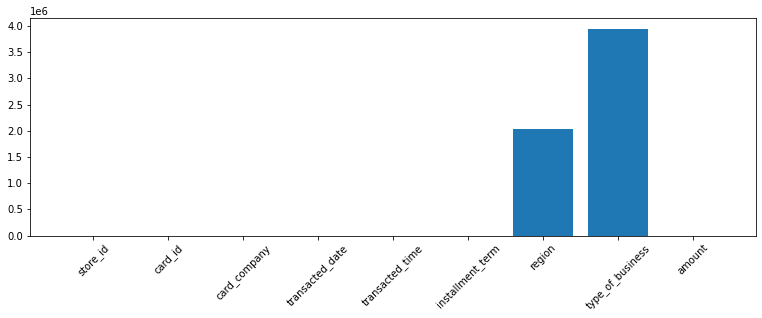

In [15]:
plt.figure(figsize=(13, 4)) 
# 가로13, 세로4인 그래프 그리기
plt.bar(train.columns, train.isnull().sum()) 
# bar 그래프로, 각 컬럼에서, isnull() 메소드를 이용해 결측치가 있는지 확인하고, 갯수를 sum()으로 계산
plt.xticks(rotation=45)
# x축 이름의 기울기: 45도

- region(지역)과 type_of_business(업종) 속성에 결측치 존재함을 확인했다.
- 현재 상점의 지역과 업종은 절반 이상이 결측치임이 보인다.
- 해당 결측치는 범주형 속성이며, 대치할 방법도 없어 열 전체를 제거하기로 결정하였다.

In [16]:
train = train.drop(['region','type_of_business'],axis=1) 
# 해당 열을 열 기준(axis=1)으로 제거
train.head()

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,amount
0,0,0,b,2016-06-01,13:13,0,1857.142857
1,0,1,h,2016-06-01,18:12,0,857.142857
2,0,2,c,2016-06-01,18:52,0,2000.000000
3,0,3,a,2016-06-01,20:22,0,7857.142857
4,0,4,c,2016-06-02,11:06,0,2000.000000


##### # amount(매출액) 변수에 대한 이상치 존재 확인 ([상자그림](https://boxnwhis.kr/2019/02/19/boxplot.html))

<AxesSubplot:xlabel='amount'>

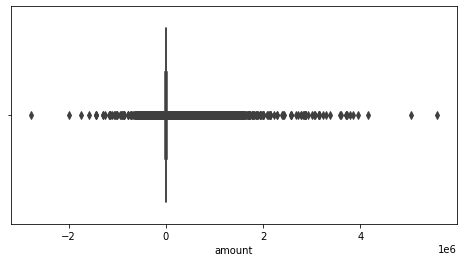

In [17]:
plt.figure(figsize=(8, 4))
sns.boxplot(train['amount'])

- 해당 상자그림은 상점 매출액의 이상치 즉, 매출액이 0 미만인 것을 확인하기 위함이다.
- 매출액에 음수가 존재한다는 것이 의미하는 것은, 카드 거래 데이터에서 환불이 발생한 것이다.
- 음수의 매출액은 상점 매출액을 예측할 때 방해가 되는 노이즈다. 매출 거래 내역의 과대 계산의 요소가 될 수 있다.
- 따라서 환불 발생 현황을 확인하기 위해 매출액이 0 미만인 행을 출력하기로 한다.

In [18]:
# 환불 발생 현황을 확인하기 위해 매출액이 0 미만인 행을 출력
train[train['amount']<0].head()

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,amount
41,0,40,a,2016-06-10,17:26,2,-8571.428571
347,0,285,a,2016-08-04,17:52,0,-1857.142857
731,0,473,g,2016-10-17,10:32,0,-2000.000000
831,0,230,b,2016-11-03,15:36,0,-85.714286
944,0,138,a,2016-11-28,13:21,0,-57.142857


음수로 집계된 카드 결제 내역 제거 기준:
- 환불 발생 시간 이전의 거래 내역 중 음수 매출액(환불)의 절댓값과 같은 행 제거: 이전 구매 이력을 제거하지 않으면 매출액 집계할 때 과대 계산됨
- 즉, 환불 발생일(transactid_date)와 환불 발생 시간(transacted_time) 이전 데이터 중에서 카드 아이디(card_id)가 같고 음수 매출액(amount)이 절댓값과 양수 매출액이 같은 거래 중 최근 거래를 찾아 해당 인덱스를 제거한다.

##### # 거래일과 거래 시간을 합친 datetime 변수를 만들고, 환불 거래를 제거하는 함수 정의
- 비슷한 성격의 속성을 합쳐 컬럼수를 줄였다.
- 이후 시간 변수를 월 단위로 다운샘플링 한다.

In [19]:
train.transacted_date.dtype

dtype('O')

- 'O': (Python) objects을 뜻함

In [20]:
# 거래일와 거래시간을 합친 변수를 생성합니다.
# object 타입을 datetime64[ns] 타입으로 바꿈
train['datetime'] = pd.to_datetime(train.transacted_date + " " + 
                                train.transacted_time, format='%Y-%m-%d %H:%M:%S')
train['datetime'].head()

0   2016-06-01 13:13:00
1   2016-06-01 18:12:00
2   2016-06-01 18:52:00
3   2016-06-01 20:22:00
4   2016-06-02 11:06:00
Name: datetime, dtype: datetime64[ns]

In [24]:
# train.describe()
# train.corr()

In [25]:
# # 교재에는 없으나
# # 음수 매출액이 제거된 데이터에서 각 컬럼 간 상관관계 확인
# # 본 대회 3등한 지성민님 코드 참고
# train_corr = train.corr()

# # 상관관계 그래프
# fig, ax = plt.subplots()
# fig.set_size_inches(10, 7)
# sns.heatmap(train_corr, annot=True)
# # seaborn의 heatmap라는 그래프를 그림
# # 내부 속성중 annot은 annotation. 각 셀의 값을 표시할지 결정하는 것

각 컬럼 간 상관관계는 왜 확인하는가?
- 시계열 데이터는 일정한 시간동안 수집된 일련의 순차적으로 정해진 데이터 셋의 집합으로, 시간에 관해 순서가 매겨져 있다는 점과 연속한 관측치는 서로 상관관계를 갖고 있다는 점에서 추가적으로 확인해보았다.


상관관계를 확인하는데 있어서 주의할 점:
- 연속형(숫자로 표현 가능한) 데이터에 대해서만 상관관계 분석이 가능하다.
- -1부터 1까지의 값으로 상관관계의 크기를 보여준다. 보통 0.7보다 클 경우 강한 양의 상관관계가, 0.7보다 작을 경우 강한 음의 상관관계(하나가 증가할 경우 다른 하나는 감소한다)가 있다고 판단한다.
- 증가하는 방향성에 대한 것인지 즉 인과관계를 의미하지는 않는다. X와 Y 가 유사한 경향으로 증가하거나, 하나가 증가할 때 다른 하나는 감소하는 경향이 있다는 정도를 설명하는 것이지, X 때문에 Y가 혹은 그 반대의 경우를 설명하는 것은 아니다.

##### # 환불 거래를 제거하는 함수를 정의

In [26]:
## 환불 거래를 제거하는 함수를 정의
def remove_refund(df): # 인자는 df으로 넣기
    refund = df[df['amount']<0] 
    # 매출액 음숫값 데이터(매출액 0 미만이 값)를 추출해서 refund(환불 거래) 변수에 저장
    non_refund = df[df['amount']>0] 
    # 매출액 양숫값 데이터를 추출해서 not_refund(매출 거래) 변수에 저장
    removed_data = pd.DataFrame() 
    # 제거한 데이터프레임을 removed_data 변수에 저장
    
    for i in tqdm(df.store_id.unique()): 
    # tqdm를 사용해서 어디까지 진행되었는지 확인
        divided_data = non_refund[non_refund['store_id']==i] 
        # 매출액이 양숫값인 데이터(매출 거래)를 상점별로 나눔
        divided_data2 = refund[refund['store_id']==i]
        # 매출액이 음숫값인 데이터(환불 거래)를 상점별로 나눔
        
        for neg in divided_data2.to_records()[:]: 
        # 환불 데이터를 레코드 별로 차례대로 검사합니다.
            refund_store = neg['store_id']
            # 상점 아이디를 추출합니다.
            refund_id = neg['card_id'] 
            # 환불 카드 아이디를 추출합니다.
            refund_datetime = neg['datetime'] 
            # 환불 시간을 추출합니다.
            refund_amount = abs(neg['amount']) 
            # 매출 음숫값의 절댓값을 구합니다.
                
            ## 환불 시간 이전의 데이터 중 카드 이이디와 환불액이 같은 후보 리스트를 뽑습니다.
            refund_pay_list = divided_data[divided_data['datetime']<=refund_datetime]
            # 매출 거래 시간보다 환불 시간이 더 늦은 경우의 리스트를 만들어
            refund_pay_list = refund_pay_list[refund_pay_list['card_id']==refund_id]
            # 그 경우의 카드 아이디를 뽑고,
            refund_pay_list = refund_pay_list[refund_pay_list['amount']==refund_amount]
            # 환불액을 뽑는다.
                     
            # 후보 리스트가 있으면 카드 아이디, 환불액이 같으면서 가장 최근시간을 제거합니다.
            if(len(refund_pay_list)!=0):
            # 환불거래 리스트 길이(갯수)가 0이 아니면(환불거래가 있으면)
                refund_datetime = max(refund_pay_list['datetime']) 
                # 가장 최근 시간을 구합니다
                noise_list = divided_data[divided_data['datetime']==refund_datetime] 
                # 가장 최근시간의 가장 최근 시간과
                noise_list = noise_list[noise_list['card_id']==refund_id] 
                # 환불 카드 아이디,
                noise_list = noise_list[noise_list['amount']==refund_amount] 
                # 환불액을 뽑아서
                divided_data = divided_data.drop(index=noise_list.index) 
                # 인덱스를 통해 제거합니다.
                    
        # 제거한 데이터를 데이터프레임에 추가합니다.
        removed_data = pd.concat([removed_data,divided_data],axis=0)
        # pd.concat(df): df를 인자로 받고, 데이터프레임을 이어 붙여주는 함수이다. 
        # default는 행 기준이며, 인덱스를 그대로 가져온다(인덱스 재배열 및 수정 옵션: ignore_index=True)
    
    return removed_data

##### # 노이즈 제거 후 상자그림 통해 결과 확인

100%|██████████████████████████████████████████████████████████████████████████████| 1967/1967 [15:49<00:00,  2.07it/s]


<AxesSubplot:xlabel='amount'>

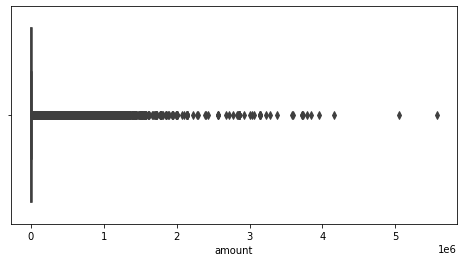

In [27]:
## 환불 거래 제거 함수를 통해 환불 거래를 제거합니다.
positive_data = remove_refund(train) # 인수에 train을 넣고 노이즈를 제거하여 positive_data 변수에 저장
plt.figure(figsize=(8, 4)) # 그래프 사이즈는 가로 8인치, 세로 4인치
sns.boxplot(positive_data['amount']) # 매출액

- 카드 거래 데이터에서 음수 매출액이 제거되었다!

In [28]:
# 음수 매출액이 제거된 데이터에서 유일한 값의 길이(갯수)를 찾고
# 2018년 12월 1일보다 큰 데이터를 나눔(최근 3개월)
store_count=len(positive_data.store_id.unique())
len(positive_data[positive_data['datetime']>="2018-12-01"])//store_count

285

### 4.2.2 다운 샘플링
- 다운 샘플링: 시계열 데이터에서 시간 간격을 넓게 재조정해 데이터 샘플 수를 줄이는 것이다.
    - 시간 구간이 작아지면 데이터 양이 증가한다고 해서 업-샘플링(up-sampling)이라 하고,
    - 시간 구간이 커지면 데이터 양이 감소한다고 해서 다운-샘플링(down-sampling)이라 한다. [참고](https://seong6496.tistory.com/85)
        - 예) [년,월,일,시,분,초] 데이터를 월 단위 다운 샘플링 하면 [년, 월]로 샘플링 된다.
- 시간 간격을 좁게 해 시계열 모델을 만들면 예측해야 하는 구간이 커져 불확실성이 증가하므로, 다운 샘플링 과정을 통해 샘플 수를 줄이고 예측 구간을 작게 해서 불확실성을 줄여야 한다.

##### # 주어진 데이터의 시간 간격 확인

In [29]:
# 5개의 행을 출력합니다.
positive_data.head()

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,amount,datetime
0,0,0,b,2016-06-01,13:13,0,1857.142857,2016-06-01 13:13:00
1,0,1,h,2016-06-01,18:12,0,857.142857,2016-06-01 18:12:00
2,0,2,c,2016-06-01,18:52,0,2000.000000,2016-06-01 18:52:00
3,0,3,a,2016-06-01,20:22,0,7857.142857,2016-06-01 20:22:00
4,0,4,c,2016-06-02,11:06,0,2000.000000,2016-06-02 11:06:00


- 거래 시간을 기준으로 분 단위로 기록된 결제 이력을 확인할 수 있다.
- 본 대회의 문제는 미래 3개월 매출액의 총합이므로, 3개월은 일 단위로 계산했을 때 약 90일이며, 시간 단위로 계산했을 때 2,160시간이다.
- 데이터는 분 단위로 되어 있으며, 예측할 구간이 많다는 단점이 있다.


- 시계열 모델은 예측 구간이 많아지면 불확실성이 커져 정확도가 떨어지는 문제가 발생한다.
- 따라서 시간 간격을 재조정해 예측 구간을 최소화 해야 한다.

##### # 월 단위 다운 샘플링 함수를 정의 (예측 구간을 최소하 하기 위해)
- df.str.slice(): 인덱스 사이 값 반환(2016-06-01이라면, stop=7이므로, 7번째 인덱스인 2016-06까지의 값을 반환함) [참고](https://blog.naver.com/wideeyed/221603778414)
- df.drop_duplicates(): 컬럼 'year_month'의 중복값을 제거함
- df.reset_index(): 전처리 과정을 거치게 되면 인덱스가 뒤죽박죽인 경우가 많은데, 이럴 때 인덱스를 다시 처음부터 재배열 해주는 유용한 함수 [참고](https://kongdols-room.tistory.com/123)
    - drop:  인덱스로 세팅한 열을 데이터프레임 내에서 삭제할지의 여부
    - inplace: 원본 객체를 변경할지의 여부
- 각 상점의 다운 샘플링을 진행할 때 매출이 발생하지 않았던 월은 2로 대치(fillna(2))
    - 0으로 대치하지 않은 이유: 이후 시계열 데이터의 진동 폭을 안정화하기 위해 로그 정규화를 진행하기 때문
    - 1 이하 값은 로그 정규화를 할 때 음수나 무한대가 나오기에 2로 대치함
- 상점의 매출 발생이 시작된 월부터 데이터 유지함
- 시간 간격을 월 단위로 재조정해 다운 샘플링 진행함

In [30]:
# 월 단위 다운 샘플링 함수를 정의
def month_resampling(df): # 인자는 df
    new_data = pd.DataFrame() 
    # 년도와 월을 합친 변수를 생성합니다.
    df['year_month'] = df['transacted_date'].str.slice(stop=7) # 7번째 인덱스까지 출력 (상단 함수 설명)
    # 데이터의 전체 기간을 추출합니다.
    year_month = df['year_month'].drop_duplicates() # 중복값 제거 (상단 함수 설명)
    # 상점 아이디별로 월 단위 매출액 총합을 구합니다.
    downsampling_data = df.groupby(['store_id', 'year_month']).amount.sum() # 매출액 총합 구하기
    downsampling_data = pd.DataFrame(downsampling_data)
    downsampling_data = downsampling_data.reset_index(drop=False,inplace=False) 
    # df.reset_index(): 행 인덱스 초기화
    # drop: 인덱스로 세팅한 열을 데이터프레임 내에서 삭제할지의 여부
    # inplace: 원본 객체를 변경할지의 여부
    
    for i in tqdm(df.store_id.unique()): # 상점 아이디의 유일한 값으로 접근
        # 상점별로 데이터를 처리합니다.
        store = downsampling_data[downsampling_data['store_id']==i]
        # 각 상점의 처음 매출이 발생한 월을 구합니다.
        start_time = min(store['year_month'])
        # 모든 상점을 전체 기간 데이터로 만듭니다.
        store = store.merge(year_month,how='outer')
        # 데이터를 시간순으로 정렬합니다.
        store = store.sort_values(by=['year_month'], axis=0, ascending=True) # 오름차순, 즉 시간순으로 정렬
        store['amount'] = store['amount'].fillna(2)   # 매출이 발생하지 않는 월은 2로 채웁니다.
        store['store_id'] = store['store_id'].fillna(i)  # 상점 아이디 결측치를 채웁니다.
        store = store[store['year_month']>=start_time]  # 처음 매출이 발생한 월 이후만 뽑습니다.
        
        new_data = pd.concat([new_data,store],axis=0)
        
    return new_data

In [31]:
# 환불 제거 데이터를 월 단위로 다운 샘플링합니다.
resampling_data = month_resampling(positive_data)
resampling_data['store_id'] = resampling_data['store_id'].astype(int) # int로 타입을 바꿔줌
resampling_data

100%|█████████████████████████████████████████████████████████████████████████████| 1967/1967 [00:15<00:00, 127.18it/s]


,store_id,year_month,amount
0,0,2016-06,7.470000e+05
1,0,2016-07,1.005000e+06
2,0,2016-08,8.697143e+05
3,0,2016-09,8.978571e+05
4,0,2016-10,8.354286e+05
...,...,...,...
17,2136,2018-10,2.012214e+06
18,2136,2018-11,2.127643e+06
19,2136,2018-12,2.427429e+06
20,2136,2019-01,1.867786e+06


In [32]:
col=['store_id','datetime','amount'] # 컬럼 속성을 지정해줌
positive_data.loc[:,col] # 데이터 확인, 행 전부와 위에서 지정한 컬럼을 가져옴

,store_id,datetime,amount
0,0,2016-06-01 13:13:00,1857.142857
1,0,2016-06-01 18:12:00,857.142857
2,0,2016-06-01 18:52:00,2000.000000
3,0,2016-06-01 20:22:00,7857.142857
4,0,2016-06-02 11:06:00,2000.000000
...,...,...,...
6556606,2136,2019-02-28 23:03:00,3928.571429
6556609,2136,2019-02-28 23:24:00,4142.857143
6556610,2136,2019-02-28 23:24:00,4500.000000
6556611,2136,2019-02-28 23:27:00,571.428571


- 카드 결제 이력 데이터에 대해 월 단위로 시간 간격을 재조정한 결과 확인할 수 있다.
- 미래 3개월의 매출을 예측할 때 예측 구간이 3개로 줄었다.
- 다운 샘플링은 예측 구간을 최소화해 불확실성을 줄여준다. 하지만, 시간 간격을 너무 크게 재조정하면 작은 데이터 샘플로 인해 정확도가 오히려 떨어지므로, 지속적인 탐색을 통해 적절한 다운 샘플링 시간 간격을 찾는 것이 주요 과제이다.

### 4.2.3 날짜 지정 범위 생성과 시리즈 객체 변환
시계열 데이터 분석을 위해서는 데이터 프레임을 시리즈 객체로 변환해야 한다.
- 시계열 데이터의 __정상성__을 확인하기 위한 단위근 검정과 시계열 모델 구축 과정에서 시리즈 객체를 사용한다.
    - 시계열 데이터의 __정상성__: 평균과 분산 같은 통계적 특성이 시간에 대해 일정한 성질이다.

In [33]:
## 데이터 타입을 출력
print(type(resampling_data))
# 데이터프레임이므로, 시리즈로 변환시켜야 한다.

<class 'pandas.core.frame.DataFrame'>


##### # 데이터프레임을 Series로 변환하는 함수 정의
- 시리즈 객체로 변환하기 전에 인덱스를 시간 변수로 정의한다. 시간 변수의 날짜 지정 범위를 생성해야 하는데, 판다스에서 date_range 함수가 그 기능을 한다. 이를 활용해 인덱스에 날짜 지정 범위를 생성하고 시리즈 객체까지 변환할 것이다.


- 상점 아이디 별로 인덱스에 날짜 지정 범위를 생성, 시리즈로 변환한다.
- 주어진 데이터에서는 1,967개 상점 데이터를 시리즈 객체로 변환해야 하므로, 이를 구현하는 함수를 정의한다.


- date_range 의 옵션 중 freq는 빈도(frequency)를 설정한다. 
- BM: business month end frequency 월의 공휴일이 아닌 마지막 날짜 [참고1](https://workingwithpython.com/date_range/), [참고2](https://rfriend.tistory.com/503)

In [34]:
# 데이터프레임을 Series로 변환하는 함수
def time_series(df, i): # 다운 샘플링한 데이터프레임과 상점 아이디를 인자로 넣는다
    # 상점별로 데이터를 뽑습니다.
    store = df[df['store_id']==i]
    # 판다스의 date_range 함수를 통해 시리즈 객체의 인덱스에 지정할 날짜 범위를 생성한다
    ## 날짜 지정 범위는 영업 시작 월부터 2019년 3월 전까지 영업 마감일 기준
    index = pd.date_range(min(store['year_month']),'2019-03',freq='BM') 
    # date_range 의 옵션 중 freq는 빈도(frequency)를 설정한다.
    # BM: business month end frequency 월의 공휴일이 아닌 마지막 날짜
    ## 시리즈 객체로 변환
    ts = pd.Series(store['amount'].values,index=index)
    return ts

왜 시리즈 객체로 변환했는가?
- 차후 시계열 데이터 분석(ADF-검증)을 위해서는 시리즈 객체(해당 검증의 인자가 시리즈)가 있어야 한다.

In [35]:
# 상점 아이디가 0번인 데이터를 시리즈 객체로 변환
store_0 = time_series(resampling_data, 0)
store_0

2016-06-30    7.470000e+05
2016-07-29    1.005000e+06
2016-08-31    8.697143e+05
2016-09-30    8.978571e+05
2016-10-31    8.354286e+05
2016-11-30    6.970000e+05
2016-12-30    7.618571e+05
2017-01-31    5.856429e+05
2017-02-28    7.940000e+05
2017-03-31    7.202571e+05
2017-04-28    6.852857e+05
2017-05-31    7.444286e+05
2017-06-30    6.820000e+05
2017-07-31    7.282857e+05
2017-08-31    7.490000e+05
2017-09-29    8.408571e+05
2017-10-31    6.005714e+05
2017-11-30    6.308571e+05
2017-12-29    8.127143e+05
2018-01-31    6.431429e+05
2018-02-28    6.852857e+05
2018-03-30    8.484286e+05
2018-04-30    6.361429e+05
2018-05-31    6.864286e+05
2018-06-29    7.072857e+05
2018-07-31    7.587143e+05
2018-08-31    6.798571e+05
2018-09-28    6.518571e+05
2018-10-31    7.390000e+05
2018-11-30    6.760000e+05
2018-12-31    8.745714e+05
2019-01-31    6.828571e+05
2019-02-28    5.152857e+05
Freq: BM, dtype: float64

- 인덱스가 지정한 날짜 범위와 영업 마감일 기준으로 출력되었다.

In [36]:
# 상점 아이디가 1번인 데이터를 시리즈 객체로 변환하고
# 데이터 타입을 출력
store_1 = time_series(resampling_data, 1)
print(type(store_1))

<class 'pandas.core.series.Series'>


<AxesSubplot:>

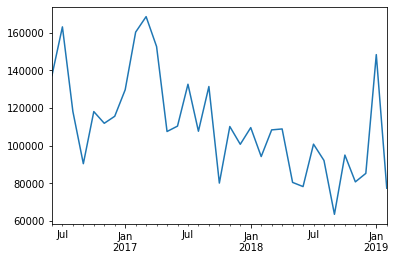

In [37]:
store_1.plot()

<AxesSubplot:>

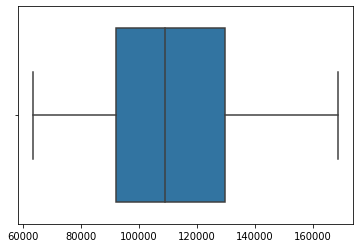

In [38]:
sns.boxplot(store_1)

<AxesSubplot:>

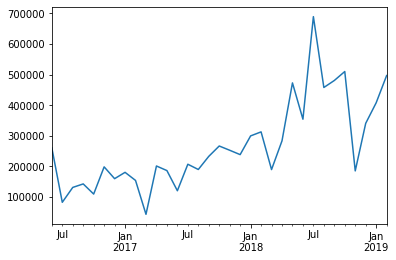

In [39]:
# 상점 아이디가 2번인 데이터를 시리즈 객체로 변환하고
# 시계열 그래프 그리기
store_2 = time_series(resampling_data, 2)
store_2.plot()

<AxesSubplot:>

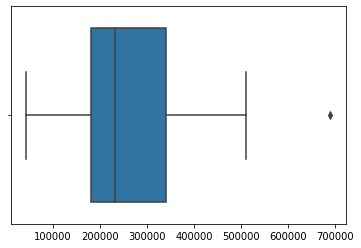

In [40]:
sns.boxplot(store_2)

그래프를 보면,
- x축에 지정한 날짜 범위(월 단위), y축에 매출액이 출력되었다. 
- 그래프는 매출액의 변동이 있다는 것을 알려준다.
    - 2017년은 큰 변화가 아닌 작은 변동 폭
    - 2018년 3월 이후부터 매출액의 상승이 커지다가, 2018년 7월에 매출액이 최고를 기록함
    - 2018년 7월 최고액을 찍고 급격히 감소
- 2017년 데이터는 작은 변동 폭을 기록하는데, 이러한 변화는 큰 트렌드가 아니기 때문에 로그 정규화를 하면 변동이 안정화되어 더 큰 트렌드를 파악할 수 있다.
- 시계열 모델 구축에서는 매출액의 변동 계수를 고려하여 작은 변동을 안정화하는 로그 정규화를 진행할 예정이다. 
    - 변동 계수: 매출액 표준편차를 평균으로 나눈 지표
    - 표준편차: 자료의 산포도를 나타내는 수치로, 분산의 양의 제곱근으로 정의된다. 표준편차가 작을수록 평균값에서 변량들의 거리가 가깝다. (위키백과)
    
    
#### 왜 로그 정규화일까? [참고](https://leebaro.tistory.com/entry/%EB%8D%B0%EC%9D%B4%ED%84%B0-%EB%B6%84%EC%84%9D-%EC%8B%9C-%EC%8B%9D%EC%97%90-%EB%A1%9C%EA%B7%B8%EB%A5%BC-%EC%B7%A8%ED%95%98%EB%8A%94-%EC%9D%B4%EC%9C%A0)
- 데이터 간 편차를 줄여서 데이터가 한쪽으로 치우치거나 몰리는 것을 방지하여 정규성을 높이고 분석(회귀분석 등)에서 정확한 값을 얻기 위함이다.
- 로그는 큰 수를 작게 만들고 복잡한 계산을 간편하게 하기 위해 사용한다. 로그를 취하는 순간 그 수는 지수가 되어버리니, 값이 작아 진다.
    
    
#### # 데이터 전처리 정리
1. 데이터의 불필요한 노이즈를 찾아 제거
2. 다운 샘플링으로 시계열 모델의 불확실성을 줄임
3. 상점별 날짜 지정 범위를 생성하고 시리즈 객체로 변환 후 시계열 모델이 무리 없이 작동하게 준비함

## 4.3 탐색적 데이터 분석
- 상점별 매출액 시계열 그래프를 통해 매출 특성을 파악한다.
- 시계열 데이터의 평균과 분산이 안정적인지 확인하기 위해 ADF-TEST(이후 설명) 진행하고 이를 통해 시계열 데이터가 정상 시계열인지 확인한다.

In [41]:
##상점 매출 시계열 그래프
def store_plot(data,start_id,end_id): # 데이터, 보고 싶은 상점의 처음과 끝
    plt.figure(figsize=(15, 6))
    for i in data['store_id'].unique()[start_id:end_id]: # 상점의 아이디를 탐색하여
        plt.plot(data[data['store_id']== i].index, data[data['store_id'] == i].amount, label='store_{}'.format(i))
        # 인덱스와 매출액을 가져와 그래프를 그린다. 
    plt.legend() # 범례

##상점 매출 분포
def store_displot(data,start_id,end_id):
    plt.figure(figsize=(15, 6))
    for i in data.store_id.unique()[start_id:end_id]:
        sns.distplot(data[data.store_id == i].amount) # 히스토그램을 그린다.
    plt.grid() # 격자를 그린다.
    plt.show()

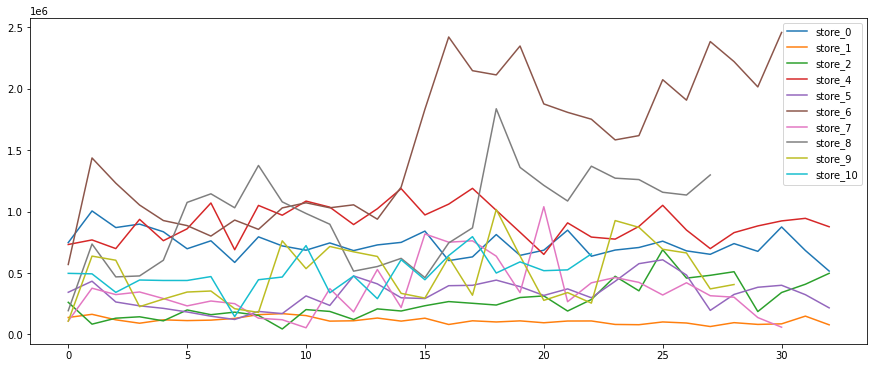

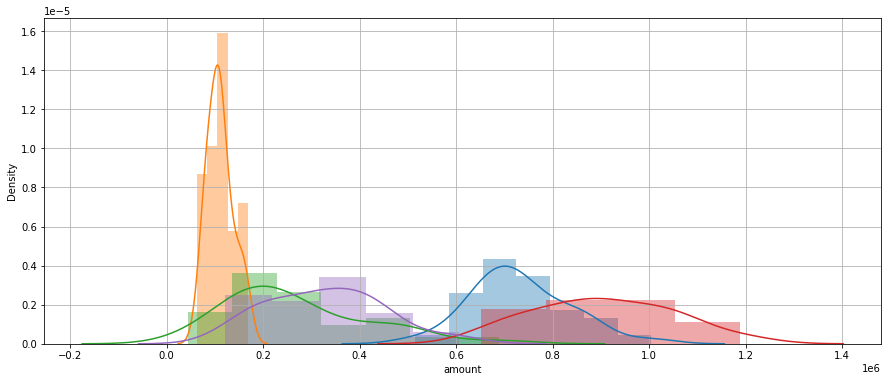

In [42]:
#store의 시계열 plot과 distplot
store_plot(resampling_data,0,10)
store_displot(resampling_data,0,5)

#### ACF. PACF 그래프 [참고](https://direction-f.tistory.com/65)
- 시계열 데이터의 성질을 분석하는데 있어서 중요하게 활용되고 있는 것이 상관도표(Correlogram)이다.
- 계열의 시차 값(lagged values) 사이의 선형 관계를 측정하므로 그로인해 시점의 차이의 영향력을 알 수 있다.
- 이에 따라 자기상관함수(ACF)와 편자기상관함수(PACF) 그래프로 계절성, 추세 등의 패턴을 확인한다.
    - 자기상관함수(Autocorrelation Function, ACF) : k 기간 떨어진 값들의 상관계수
    - 부분자기상관함수(partial ACF) : 서로 다른 두 시점의 중간에 있는 값들의 영향을 제외시킨 상관계수
        - ACF 빠르게 감소, PACF는 어느 시점에서 절단점을 갖는다
        - PACF가 2시점에서 절단점 가지면 AR(1) 모형
        - MA 모형은 ACF가 절단점을 갖고, PACF는 빠르게 감소

In [43]:
# # 대회 홈페이지에 주어진
# # acf. pacf 그래프

# def acf_pacf_plot(data=None,store_id=None):
#     ts=time_series(data,store_id)
#     fig = plt.figure(figsize=(12,8))
#     ax1 = fig.add_subplot(211)
#     plot_acf(ts,lags=20,ax=ax1)
#     ax2 = fig.add_subplot(212)
#     plot_pacf(ts, lags=20, ax=ax2)

# acf_pacf_plot(data=resampling_data, store_id=1)

In [44]:
import statsmodels.graphics.tsaplots as sgt 

def acf_pacf_plot(data=None,store_id=None):
    ts=time_series(data,store_id)
    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(2, 1, 1)
    ax2 = fig.add_subplot(2, 1, 2)
    
    sgt.plot_acf(ts, lags = 20, ax=ax1)
    ax1.set_title("ACF")
    
    sgt.plot_pacf(ts, lags = 15, ax=ax2)
    ax2.set_title("PACF")

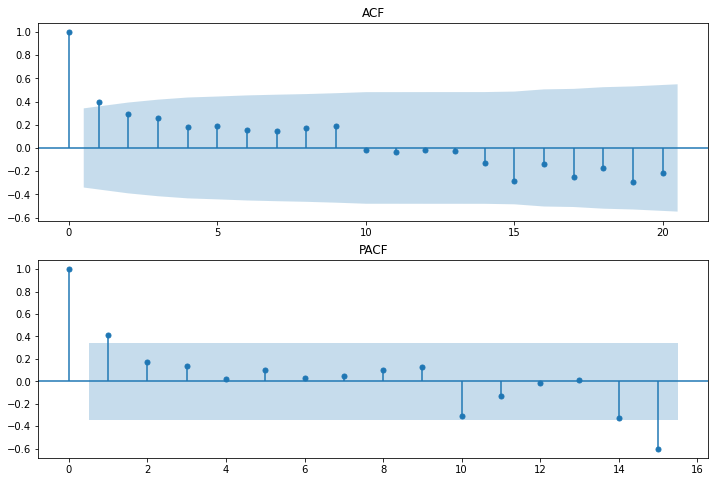

In [45]:
##상점별로 acf, pacf 그래프 확인
acf_pacf_plot(data=resampling_data, store_id=1)

- 그래프와 같이 각 상점별 매출 특성과 분포가 다르므로 개별적인 시계열 모델링이 필요해 보인다.

### 4.3.1 상점별 매출 특성
- 총 1,967개의 상점드링 어떤 특징을 가지는지 특성을 파악한다.
- 크게 3 가지로 분류하였다.

#### 1) 계절성이 있는 상점
- 우리가 예측할 시기는 계절 상 봄(3,4,5월)이고, 1학기이고, 상반기이며, 벚꽃축제 등 꽃과 식물과 관련된 축제가 많고, 가정의 달로 인한 성수기 황금연휴가 있는 시기이다.
- 사계절을 중심으로, 특정 계절을 중심으로 장사하거나 특정 계절을 중심으로 장사하지 않는 특징을 지닌 상점이 존재하는지 알아볼 것이다.
- 즉, 계절성이 있는 상점을 식별하고, 해당 상점의 봄 매출 특성을 정리해 결괏값을 예측할 것이다.

In [46]:
# 예시로, 계절성 특징을 지닌 상점 아이디 257번인 데이터를 시리즈 객체로 데이터 출력
store_257 = time_series(resampling_data, 257)
store_257

2016-06-30    4.891857e+05
2016-07-29    1.595280e+06
2016-08-31    1.518714e+06
2016-09-30    3.369143e+05
2016-10-31    4.245714e+05
2016-11-30    2.000000e+00
2016-12-30    2.000000e+00
2017-01-31    2.000000e+00
2017-02-28    2.000000e+00
2017-03-31    2.000000e+00
2017-04-28    3.928571e+04
2017-05-31    1.557286e+05
2017-06-30    5.481143e+05
2017-07-31    7.359286e+05
2017-08-31    7.909700e+05
2017-09-29    6.191429e+04
2017-10-31    1.027143e+06
2017-11-30    2.000000e+00
2017-12-29    2.000000e+00
2018-01-31    2.000000e+00
2018-02-28    2.000000e+00
2018-03-30    2.000000e+00
2018-04-30    2.000000e+00
2018-05-31    2.493857e+05
2018-06-29    4.822286e+05
2018-07-31    8.999714e+05
2018-08-31    1.645877e+06
2018-09-28    2.767857e+05
2018-10-31    2.000000e+00
2018-11-30    2.000000e+00
2018-12-31    2.000000e+00
2019-01-31    2.000000e+00
2019-02-28    2.000000e+00
Freq: BM, dtype: float64

- 앞서 데이터 전처리 시 매출이 발생하지 않았던 월은 전부 2로 대치했다. 2는 매출이 발생하지 않은 월이다.
- 즉, 257번 상점은 11~3월 매출이 0이다.

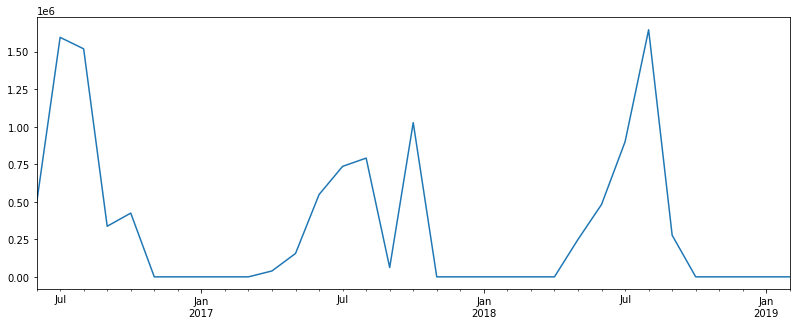

In [47]:
# 257번 상점의 시계열 그래프 그리기
store_plot_257 = store_257.plot()
fig = store_plot_257.get_figure()
fig.set_size_inches(13.5,5)

그래프를 보면,
- 겨울 시즌(11,12,1,2,3월)에는 매출이 발생하지 않고 여름 시즌(7,8월)에 많은 매출을 기록했다. 
- 즉, 이번 대회에서 예측할 3~5월에는 많은 매출액이 발생하지 않을 것으로 예측할 수 있다.

In [48]:
# 상점 아이디가 2096번인 데이터를 시리즈 객체로 데이터 출력
store_2096 = time_series(resampling_data, 2096)
store_2096

2016-07-29    5.075429e+04
2016-08-31    9.219543e+05
2016-09-30    4.720786e+05
2016-10-31    5.145714e+05
2016-11-30    1.494286e+05
2016-12-30    1.071686e+06
2017-01-31    1.602857e+06
2017-02-28    1.332143e+06
2017-03-31    2.432143e+05
2017-04-28    3.903143e+06
2017-05-31    1.729500e+06
2017-06-30    4.280214e+06
2017-07-31    1.775714e+06
2017-08-31    7.428571e+05
2017-09-29    1.415714e+06
2017-10-31    1.180714e+06
2017-11-30    4.640000e+05
2017-12-29    1.389729e+06
2018-01-31    2.000000e+00
2018-02-28    8.285714e+05
2018-03-30    7.857143e+05
2018-04-30    6.670429e+06
2018-05-31    1.837286e+05
2018-06-29    3.285714e+06
2018-07-31    9.502857e+05
2018-08-31    3.675200e+06
2018-09-28    1.793886e+06
2018-10-31    4.717743e+06
2018-11-30    7.593600e+06
2018-12-31    1.428571e+06
2019-01-31    4.285714e+05
2019-02-28    1.428571e+06
Freq: BM, dtype: float64

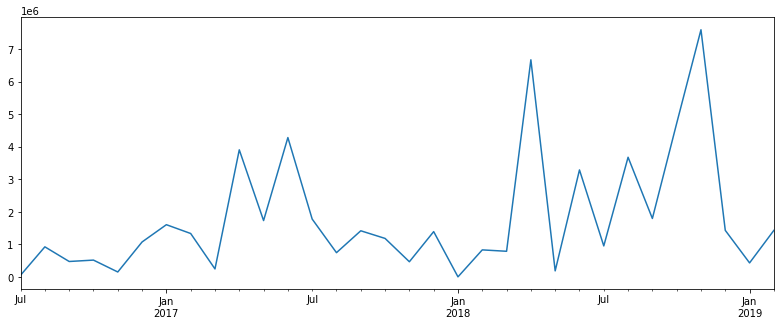

In [49]:
# 상점 아이디가 2096번인 상점의 시계열 그래프
store_plot_2096 = store_2096.plot()
fig = store_plot_2096.get_figure()
fig.set_size_inches(13.5,5)

2096번 상점을 보면,
- 겨울 시즌(1,2,3월)에 낮은 매출액을 기록하다가 4월 매출액이 급상승하는 패턴을 보여준다.
- 즉, 이번 대회에서 예측할 2019년 3~5월 기간에 매출 급상승을 예상할 수 있다.


정리하자면,
- 계절성이 있는 상점의 번호와 특징을 기록하고, 예측 모델이 정확하게 계절성을 반영해 예측했는지를 비교 분석해 오차를 줄였다.

#### 2) 추세가 있는 상점
추세가 있는 상점: 매출액이 꾸준히 증가하는 상점 또는 매출액이 꾸준히 감소하는 상점
- 증가 요인: SNS 마케팅, 유튜브 광고 등으로 매출이 증가하거나 반응이 폭발적인 상품을 취급
- 감소 요인: 위생 단속 적발, 취급 제품의 문제점 부각, 상저 이미지 추락

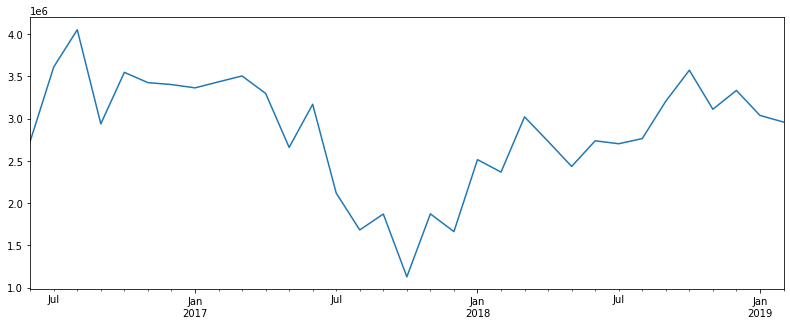

In [50]:
# 상점 아이디가 335번인 상점의 데이터를 시리즈 객체로 변환하고
# 시계열 그래프 그리기
store_335 = time_series(resampling_data, 335)
store_plot_335 = store_335.plot()
fig = store_plot_335.get_figure()
fig.set_size_inches(13.5,5)

그래프를 보면 매출액 증가와 감소 추세 모두를 지녔다.
- 매출액 증감 등의 변동은 매월 있어왔다. 이러한 월 단위의 작은 변동보다는 기간을 1년 단위로 해서 추세를 파악할 필요가 있다.
- 데이터의 전체 기간을 절반으로 나눴을 때:
    - 2016년 6월부터 2017년 10월까지: 매출액 감소 추세
    - 2017년 111월부터 2019년 2월까지: 매출액 증가 추세
- 2019년 3~5월 매출 예측할 때는 증가 추세임을 고려해야 한다.

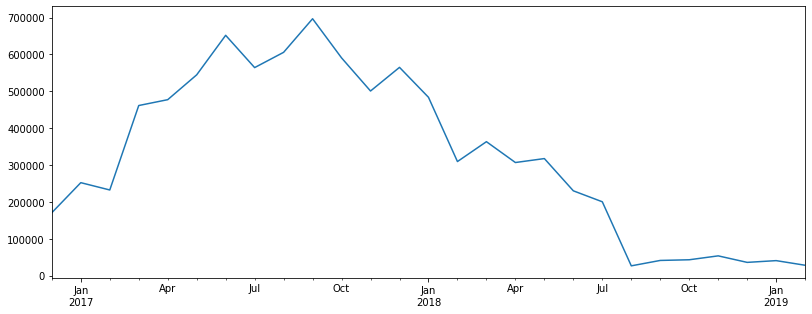

In [51]:
# 상점 아이디가 510번인 상점의 데이터를 시리즈 객체로 변환하고
# 시계열 그래프 그리기
store_510 = time_series(resampling_data, 510)
store_plot_510 = store_510.plot()
fig = store_plot_510.get_figure()
fig.set_size_inches(13.5,5)

그래프를 보면,
- 2016년 12월부터 2017년 9월까지 증가하다가,
- 201년 9월 이후에는 꾸준히 감소 추세이다.


정리하자면,
- 매출액 추세가 있는 상점의 번호와 특징을 기록하고 예측 모델이 정확하게 추세를 반영해 예측했는지를 비교 분석해 오차를 줄였다.

#### 3) 휴업 중인 상점
휴업 중인 상점: 몇 개월 동안 매출이 발생하지 않은 상점
- 중간에 폐업한 것으로 예측되는 상점도 있고, 어떤 상점은 어떠한 이유로 수개월 동안 매출이 발생하지 않다가 다시 매출이 발생한 상점도 존재한다.
    - 리모델링 위해 휴업한 상점, 매출 부진으로 인해 폐업한 상점, 계약 만료로 인해 휴업 및 폐업한 상점 등
- 2019년 1,2월의 매출이 0이거나 그 이전부터 매출액이 존재하지 않는 상점이다.

In [52]:
# 상점 아이디가 111번인 데이터를 시리즈 객체로 데이터 출력
store_111 = time_series(resampling_data, 111)
store_111

2016-06-30    812428.571429
2016-07-29    391142.857143
2016-08-31     13071.428571
2016-09-30    495714.285714
2016-10-31    182714.285714
2016-11-30    178571.428571
2016-12-30     43005.714286
2017-01-31         2.000000
2017-02-28      5428.571429
2017-03-31     24857.142857
2017-04-28    108000.000000
2017-05-31    459142.857143
2017-06-30    137571.428571
2017-07-31    216285.714286
2017-08-31     77000.000000
2017-09-29     78005.714286
2017-10-31         2.000000
2017-11-30         2.000000
2017-12-29         2.000000
2018-01-31      1428.571429
2018-02-28    309785.714286
2018-03-30    259071.428571
2018-04-30    225858.571429
2018-05-31    105571.428571
2018-06-29         2.000000
2018-07-31    123285.714286
2018-08-31         2.000000
2018-09-28     83000.000000
2018-10-31         2.000000
2018-11-30         2.000000
2018-12-31         2.000000
2019-01-31         2.000000
2019-02-28         2.000000
Freq: BM, dtype: float64

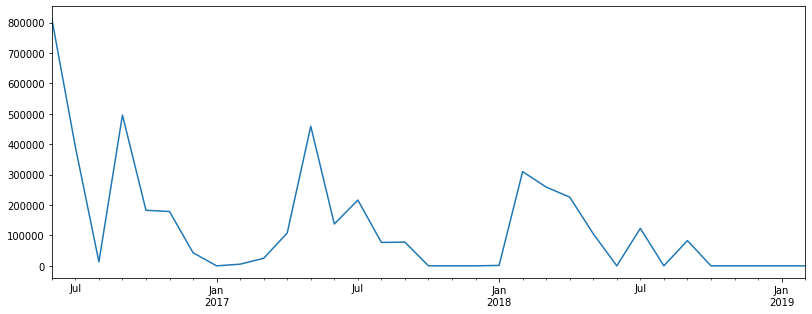

In [53]:
# 상점 아이디가 111번인 상점의 시계열 그래프
store_plot_111 = store_111.plot()
fig = store_plot_111.get_figure()
fig.set_size_inches(13.5,5)

데이터와 그래프를 보면,
- 2017년 10월부터 2017년 12월까지, 2018년 10월부터 2019년 2월까지: 매출 0
- 2017년과 비교했을 때 2018년의 휴업 기간이 더 길었다.
- 직관적으로 2019년 3~5월에는 매출이 발생하지 않을 것으로 예측할 수 있다.

In [54]:
# 상점 아이디가 279번인 데이터를 시리즈 객체로 데이터 출력
store_279 = time_series(resampling_data, 279)
store_279

2016-06-30    4.488571e+05
2016-07-29    1.156286e+06
2016-08-31    1.372857e+06
2016-09-30    3.150000e+05
2016-10-31    8.748571e+05
2016-11-30    3.128571e+05
2016-12-30    5.828571e+05
2017-01-31    3.214286e+04
2017-02-28    2.000000e+00
2017-03-31    4.955714e+05
2017-04-28    5.940000e+05
2017-05-31    1.041143e+06
2017-06-30    8.354286e+05
2017-07-31    6.171429e+05
2017-08-31    4.284286e+05
2017-09-29    1.581258e+06
2017-10-31    3.294286e+05
2017-11-30    2.241429e+05
2017-12-29    2.785714e+05
2018-01-31    4.018571e+05
2018-02-28    1.282857e+05
2018-03-30    2.000000e+00
2018-04-30    2.000000e+00
2018-05-31    2.000000e+00
2018-06-29    2.000000e+00
2018-07-31    2.000000e+00
2018-08-31    2.000000e+00
2018-09-28    2.000000e+00
2018-10-31    2.000000e+00
2018-11-30    2.101429e+05
2018-12-31    2.191571e+05
2019-01-31    1.779286e+05
2019-02-28    5.157143e+04
Freq: BM, dtype: float64

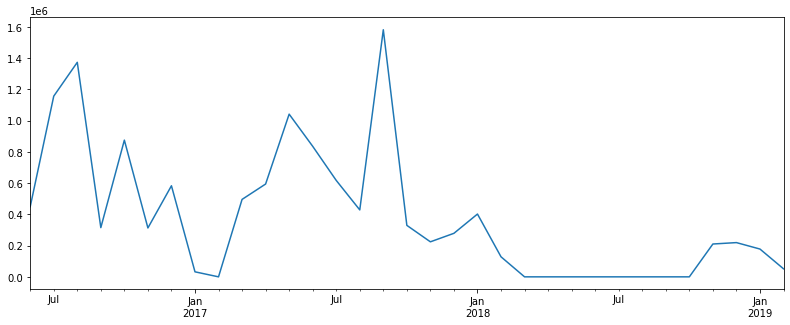

In [55]:
# 상점 아이디가 279번인 상점의 시계열 그래프
store_plot_279 = store_279.plot()
fig = store_plot_279.get_figure()
fig.set_size_inches(13.5,5)

데이터와 그래프를 보면,
- 2018년 3월부터 2018년 10월까지 장기 휴업을 했다가 2018년 11월 영업을 다시 시작했다.
- 휴업 전 매출이 감소했고, 휴업 후 영업을 재개했으나 매출이 감소하면서 휴업 가능성이 보인다.


정리하자면,
- 휴업과 폐업으로 예상되는 상점의 번호와 특징을 기록하고 예측 모델이 정확하게 반영해 예측했는지를 비교 분석해 오차를 줄였다.

### 4.3.2 시계열 데이터의 정상성
시계열 데이터의 정상성: 데이터가 시간의 변동에 따라 평균과 분산이 일정하다는 뜻이다.
- 시계열 데이터의 정상성을 판단하기 위해 ADF-TEST를 사용하였다.
- 이후 차분을 통해 비정상 시계열을 정상 시계열로 변환하는 작업을 진행했다.


#### ADF-TEST [참고](https://chukycheese.github.io/translation/statistics/augmented-dickey-fuller-test/)
ADF-TEST: Augmented Dickey-Fuller-Test
- 시계열 데이터가 정상성을 가지는지 판단할 때 사용되며, 회귀 분석 결과로 나온 계수를 검정 통계량으로 사용한다. 이를 통해 시계열 데이터가 정상성을 가지는지 검정하고, 정상성을 가지지 않으면 차분을 통해 평균을 일정하게 만들어줘야 한다.
    - 차분: 비정상 시계열을 평균이 일정한 정상 시계열로 바꾸는 기법
    - 검정에 사용하는 가설은 다음과 같다.
        - 귀무가설(H0): 자료에 단위근이 존재한다.
        - 대립가설(H1): 시계열 자료가 정상성을 만족한다(또는 추세 정상성을 만족한다). 하지만 대립가설은 어떤 방정식을 사용하느냐에 따라 조금씩 다르다.

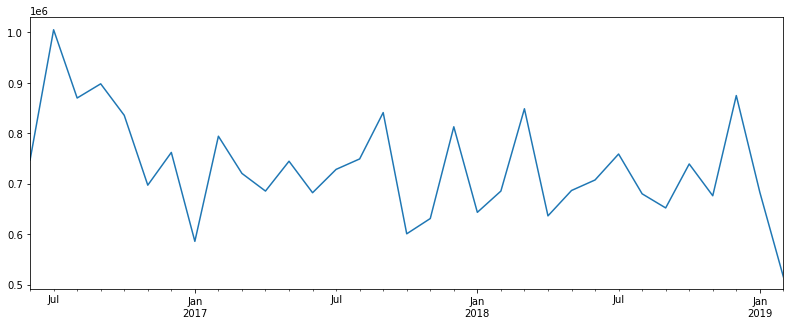

In [56]:
# 상점 아이디가 0번인 상점의 시계열 그래프
store_0 = time_series(resampling_data, 0)
store_plot_0 = store_0.plot()
fig = store_plot_0.get_figure()
fig.set_size_inches(13.5,5)

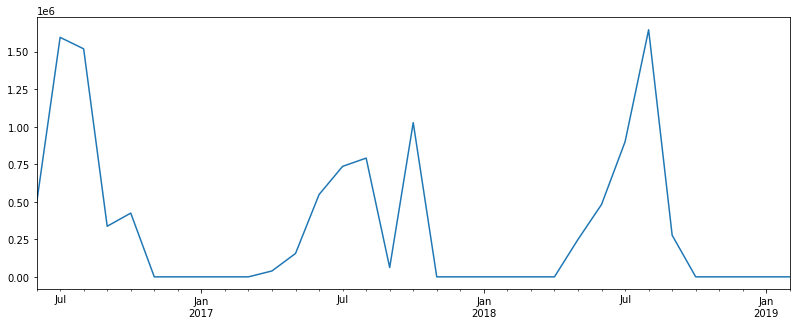

In [57]:
# 상점 아이디가 257번인 상점의 시계열 그래프
store_257 = time_series(resampling_data, 257)
store_plot_257 = store_257.plot()
fig = store_plot_257.get_figure()
fig.set_size_inches(13.5,5)

상점 0번과 상점 257번을 비교해보면,
- 0번 상점은 매출액 시계열의 평균과 분산이 일정하다
- 257번 상점은 계절성을 띄고 평규노가 분산의 변동 폭이 크다.

이제 ADF 검정을 사용해 두 상점이 정상 시계열인지 확인할 것이다.
- ADF 검정은 통계학에서 시행하는 가설 검정의 절차를 따른다.
- 검정을 시행하기 전 257번 상점의 매출액 시계열에 대한 가설을 설정한다.
    - 귀문가설: 시계열 자료가 정상 시계열이 아니다.
    - 대립가설: 시계열 자료가 정상성을 만족한다.

- ADFTest(): 매개변수 alpha는 가설 검정을 할 때 p-값의 기준점을 의미한다. 디폴트는 0.05이며 실수를 입력한다.
- p_val: p-값(p-value)은 귀무 가설(null hypothesis)이 맞다는 전제 하에, 표본에서 실제로 관측된 통계치와 '같거나 더 극단적인' 통계치가 관측될 확률이다. 여기서 말하는 확률은 '빈도주의' (frequentist) 확률이며, p-값(p-value)는 관찰된 데이터가 귀무가설과 양립하는 정도를 0에서 1 사이의 수치로 표현한 것이다. [위키백과](https://ko.wikipedia.org/wiki/%EC%9C%A0%EC%9D%98_%ED%99%95%EB%A5%A0)
- should_diff(): 인자로 시리즈 객체를 받고, p-value 값과 차분이 필요한지를 T/F로 반환한다.

In [58]:
# pmdarima 패키지에 있는 ADFTest 클래스를 임포트
from pmdarima.arima import ADFTest

# 상점 아이디가 0번인 데이터를 시리즈 객체로 변환
store_0 = time_series(resampling_data, 0)

# ADF-Test 시행
p_val, should_diff = ADFTest().should_diff(store_0)
print('p_val : %f , should_diff : %s' %(p_val, should_diff))

p_val : 0.022488 , should_diff : False


In [59]:
# 상점 아이디가 257번인 데이터를 시리즈 객체로 변환
store_257 = time_series(resampling_data, 257)
# ADF-Test 시행
p_val, should_diff = ADFTest().should_diff(store_257)
print('p_val : %f , should_diff : %s' %(p_val, should_diff))

p_val : 0.093614 , should_diff : True


0번 상점과 257번 상점의 p-값을 보면,
- 매개변수 alpha는 p-값의 기준인 0.05인데, 이보다 낮으면 대립 가설이 채택되고 높으면 귀문 가설이 채택된다.
- 즉, 257번 상점은 높으므로 정상 시계열이 아니며 차분이 필요하다.


|상점 아이디|p-값|정상시계열|차분(should_diff)|
|:---:|:---:|:---:|:---:|
|0|0.022488|O|필요없음|
|257|0.093614|X|필요함|


이렇게 1,967개의 상점을 개별적으로 가설 검정을 하면 비효율적이므로, 
- 1,967개 상점의 ADF 검정의 p-값을 파이썬의 리스트 자료형에 저장하여 상자 그림으로 분포를 확인한다.
- p-값이 0.05보다 작은 상점 개수를 계산한다.
- 매출이 수개월간 발생하지 않는 상점은 ADF 검정이 오류가 발생하여 예외처리를 진행한다.
- 이를 구현한 함수를 정의한다.

##### # 상점 아이디별 차분 여부 결정하기 위한 함수

100%|█████████████████████████████████████████████████████████████████████████████| 1967/1967 [00:07<00:00, 251.81it/s]


<AxesSubplot:>

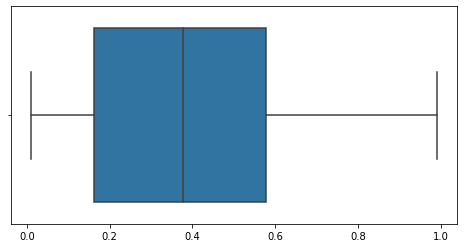

In [60]:
## ARIMA 모델의 차분 여부를 결정하기 위한 단위근 검정
def adf_test(y):
    return ADFTest().should_diff(y)[0]

adf_p = [] # 검정하고 난 후 p-값의 리스트
count = 0 # 초기화
skipped = [] # p-값이 0.05보다 높았던 경우나 이외의 값의 리스트

for i in tqdm(resampling_data['store_id'].unique()):
    ts = time_series(resampling_data,i)
    try:
        p_val = adf_test(ts)
        if p_val < 0.05:
            count += 1
        adf_p.append(p_val)
    except:
        skipped.append(i)

plt.figure(figsize=(8, 4))
sns.boxplot(adf_p)

1,967개 상점의 ADF 검정을 시행한 p-value의 분포를 보면 대부분 상점이 기준점인 0.05보다 p-value가 높다는 것을 확인할 수 있다.
- 따라서 시계열 모델링을 진행하기 전에 비정상 시계열 자료를 차분을 통해 정상 시계열로 변환했다.

In [61]:
# p-value가 0.05보다 작은 상점의 개수
print(count)

259


In [62]:
# ADF-Test 오류 상점 개수
print(skipped)
print(f"WarningCount: {len(skipped)}, store_id_list:{skipped}")

[]
WarningCount: 0, store_id_list:[]


In [63]:
# 코드 상 나오지 않아 교재에서 지정한 상점을 출력함
# # ADF-Test 오류 상점 개수
# if skipped:
#     print(f"WarningCount: {len(skipped)}, store_id_list:{skipped}")
    
# WarningCount: 1, store_id_list:[795]

In [64]:
# 상점 아이디가 795번인 데이터를 시리즈 객체로 변환
store_795 = time_series(resampling_data, 795)

# ADF-Test 시행
p_val, should_diff = ADFTest().should_diff(store_795)
print('p_val : %f , should_diff : %s' %(p_val, should_diff))

p_val : nan , should_diff : False


하지만 요류가 발생하기도 했다.
- 795번 상점은 매출액이 수 개월간 발생하지 않았다.

## 4.4 모델 구축과 검증
본 팀은 파이썬에서 시계열 모델링을 쉽게 하기 위해 다양한 시계열 모델링 함수를 제공하는 R의 forecast 패키지를 파이썬과 연동했다.
- 자기회귀누적이동평균(ARIMA) 모델, 지수평활법, STL 분해를 적용한 지수평활법 등 시계열 모델을 이용해 상점의 매출을 예측했다.


### 4.4.1 파이썬에서 R 시계열 패키지 forecast를 통한 모델링
rpy2에 설치된 R 패키지 utils를 이용하여 설치한다.

In [65]:
from rpy2.robjects.packages import importr # rpy2 내의 패키지를 불러올 importr 클래스

utils = importr('utils') # utils 패키지를 임포트
utils.install_packages('forecast') # r의 forecast 패키지 설치.
utils.install_packages('forecastHybrid') # r의 forecastHybrid 패키지 설치

rpy2.rinterface.NULL

utils 패키지의 install_packages 함수를 이용해 r의 forecast 패키지, r의 forecastHybrid 패키지를 설치한다.
- forecast: 다양한 시계열 모델링 기능을 제공
- forecastHybrid: 시계열 모델을 쉽게 앙상블 예측하는 기능을 제공


위 코드 실행하면 'Secure CRAN mirrors' 창이 뜨는데, 0-cloud[https]를 선택하고 확인하면, R 패키지를 설치할 수 있다.
![Secure CRAN mirrors](https://www.waterloohydrogeologic.com/help/hga/r_console_cran_mirrors.png)

R 패키지와 r의 함수
- rpy2.robjects: r 함수를 파이썬에서 실행할 수 있게 해주는 모듈
- pandas2ri: 파이썬 자료형과 R 자료형의 호환을 도와주는 모듈


##### # r의 forecast 패키지를 이용해 상점 아이디가 0번인 상점에 대해 ARIMA 모델로 예측값을 생성한 예시:
- robjects.r(): 
    - r코드로 정의된 함수와 r의 내장함수를 파이썬에서 사용할 수 있게 해준다.
    - r의 시계열 자료형을 생성해주는 ts 함수와 vector를 생성해주는 c 함수를 사용할 수 있게 한다.
- auto_arima: 
    - str형식과 r 코드로 정의된 함수
    - forecast 패키지를 로드하고 auto.arima 함수를 이용해 모델을 생성, 상점의 미래 3개월 매출액을 변환해준다.
    - r의 데이터프레임 자료형으로 예측값을 변환하므로, pandas2ri의 rpy2 함수를 사용하여 r 자료형을 파이썬 자료형으로 변환한다.
- ts(): 
    - start 인자에는 영업 시작 년도와 월을 r의 자료형인 벡터의 형태로 넘긴다.
    - frequency 인자에는 1년이 12개월이므로, 12를 넣는다.
- np.sum():
    - 3개월 매출액의 총합계 계산

In [66]:
import rpy2.robjects as robjects # r 함수를 파이썬에서 사용 가능하게 변환하는 모듈
from rpy2.robjects import pandas2ri # 파이썬 자료형과 R 자료형의 호환을 도와주는 모듈

# pandas2ri를 활성화 
pandas2ri.activate()

auto_arima = """
    function(ts){
        library(forecast) # forecast 패키지 로드
        d_params = ndiffs(ts) # 시계열 자료의 차분 횟수 계산
        model = auto.arima(ts, max.p=2, d=d_params) # auto.arima 모델 생성
        forecasted_data = forecast(model, h=3) # 이후 3개월(h=3)을 예측
        out_df = data.frame(forecasted_data$mean) # 예측값을 R의 데이터프레임으로 변환
        colnames(out_df) = c('amount') # amount라는 열로 이름을 지정
        out_df
    }
"""

# r() 함수로 r 자료형을 파이썬에서 사용 가능
auto_arima = robjects.r(auto_arima)
ts = robjects.r('ts')# r 자료형 time series 자료형으로 만들어주는 함수
c = robjects.r('c') # r 자료형 벡터를 만들어주는 함수

store_0 = resampling_data[resampling_data['store_id']==0] # 0번 상점
start_year = int(min(store_0['year_month'])[:4]) # 영업 시작 년도
start_month = int(min(store_0['year_month'])[5:]) # 영업 시작 월

# R의 ts 함수로 r의 time series 자료형으로 변환
train = ts(store_0['amount'], start=c(start_year, start_month), frequency=12) 

In [67]:
store_0['year_month']

0     2016-06
1     2016-07
2     2016-08
3     2016-09
4     2016-10
5     2016-11
6     2016-12
7     2017-01
8     2017-02
9     2017-03
10    2017-04
11    2017-05
12    2017-06
13    2017-07
14    2017-08
15    2017-09
16    2017-10
17    2017-11
18    2017-12
19    2018-01
20    2018-02
21    2018-03
22    2018-04
23    2018-05
24    2018-06
25    2018-07
26    2018-08
27    2018-09
28    2018-10
29    2018-11
30    2018-12
31    2019-01
32    2019-02
Name: year_month, dtype: object

In [68]:
min(store_0['year_month'])

'2016-06'

In [69]:
(store_0['year_month'])[:4] # 영업 시작 년도 처음 4개월

0    2016-06
1    2016-07
2    2016-08
3    2016-09
Name: year_month, dtype: object

In [70]:
# auto_arima으로 ensemble model 앙상블 학습
forecast = auto_arima(train)

In [71]:
type(forecast)

rpy2.robjects.vectors.DataFrame

In [72]:
np.sum(pandas2ri.ri2py(forecast).values) # 3개월 매출을 합산

2007226.9722140946

### 4.4.2 시계열 모델 선택과 검증
3 가지 방법으로 1,967개 상점의 3개월 매출액의 총합을 생성하고, submission 파일을 생성해 리더보드 점수를 확인한다.

#### 1) 자기회귀누적이동평균(ARIMA) 모델
1. AR 모델과 MA 모델이란?
- AR 모델: 자기회귀 모델이며, 미래 예측에 자기 과거를 사용하기 때문이다.
    - 자신의 이전 관측값이 자신의 이후 관측값에 영향을 주는 모델이다.
    - __AR 모델 수식__ $y_{t}$ = c + $\phi_{1}$$y_{t-1}$ + $\phi_{2}$$y_{t-2}$ + ··· + $\phi_{p}$$y_{t-p}$ + $ε_{t}$
- MA 모델: 이동평균 과정
    - 현재 시계열 데이터가 과거 잔차들의 가중평균으로 구성되는 모델이다.
    - __MA 모델 수식__ $y_{t}$ = c + $ε_{t}$ + $θ_{1}$$ε_{t-1}$ + $θ_{2}$$ε_{t-2}$ + ··· + $θ_{q}$$ε_{t-q}$ 
        - 가중평균: 데이터 세트에서 숫자의 다양한 중요도를 고려하는 계산이다. 가중 평균을 계산할 때, 최종 계산이 이루어지기 전에 데이터 세트의 각 숫자에 미리 정해진 가중치를 곱합니다. 데이터 세트에 있는 값의 빈도를 동일하게 하기 위해 가장 자주 계산된다.
        - 잔차항: 백색잡음
        - 백색잡음: 자기상관(autocorrelation)이 없는 시계열
        - 자기상관: 시계열의 시차 값(lagged values) 사이의 선형 관계를 측정 
        - 현재 데이터: 과거 백색잡음의 평균값
        
        
2. 자기회귀누적이동평균(ARIMA) 모델이란?
- AR 모델과 MA 모델을 섞은 모델이다. 두 모델을 결합하면 분석의 정확도도 많이 올라가지만, 수식도 아주 쉽게 결합한다.
- 가운데 글자 I는 차분을 구하는 것을 의미한다.
- - __ARIMA 모델 수식__ $y_{t}'$ = c + $\phi_{1}$$y_{t-1}'$ + ··· + $\phi_{p}$$y_{t-p}'$ + $θ_{1}$$ε_{t-1}$ + ··· + $θ_{q}$$ε_{t-q}$ + $ε_{t}$
    - 차분: 평균이 일정하지 않은 시계열 데이터의 평균이 일정하게 해주는 기법이며, 연이은 관측값들의 차이를 계산한다.
    - yi의 과거 시차 값과 과거 시차 오차를 모두 포함한다. 
    - ARiMA(p,d,q) 모델이라 한다.
    |식별 값|의미|
    |---|---|
    |p|자기회귀의 부분 차수. 즉 AR 모형 차수|
    |d|1차 차분이 포함된 정도. 즉 차분 차수|
    |q|이동평균의 부분 차수. 즉 MA 모형 차수|
    

- 시계열 데이터가 정상성인 경우에 주로 사용되며, 초기 차분 단계를 한 번 이상 적용해 비정상성을 제거할 수 있다.
    - 차분 횟수를 결정할 때는 R의 forecast 패키지의 ndiff 함수가 적절한 차분 횟수를 반환해준다.
    - auto.arima 함수가 최적화된 AR항의 p값, MA항의 q값, I항에 대한 d값을 계산해준다.

#### ARIMA 모델링 과정

1. 데이터를 그래프로 나타내고, 특이한 관측값을 찾는다.
2. 데이터가 정상성을 나타내지 않는다면, 데이터가 정상성을 나타낼 때까지 데이터를 가지고 1차 차분을 계산한다. 즉, 데이터를  d번 차분(differencing)한 후에 AIC를 최소화하여 p와 q를 고른다.
3. ACF/PACF를 살펴본다. 
4. 잔차의 ACF를 그리고 잔차의 포트맨토(portmanteau) 검정을 하여 모델에서 잔차를 확인한다. 백색잡음이 보이지 않는다면, 수정된 모델을 사용한다.
5. 잔차가 백색잡음처럼 보이면, 예측값을 계산한다.

##### # 자기회귀누적이동평균 모델을 사용해 1,967개 상점의 미래 3개월 매출액 총합을 계산하는 코드    
- str형식으로 정의된 auto_arima를 이용해 예측값을 생성한다.
- 파라미터:
    - max.p(자기회귀의 부분 차수의 최대값)=2
    - d값(차분 차수)은 ndiff로 계산한 값을 d_params 변수에 담아 고정 파라미터로 함

In [73]:
import rpy2.robjects as robjects # r 함수를 파이썬에서 사용 가능하게 변환하는 모듈
from rpy2.robjects import pandas2ri # 파이썬 자료형과 R 자료형의 호환을 도와주는 모듈

# pandas2ri를 활성화 
pandas2ri.activate()

auto_arima = """
    function(ts){
        library(forecast) # forecast 패키지 로드
        d_params = ndiffs(ts) # 시계열 자료의 차분 횟수 계산
        model = auto.arima(ts, max.p=2, d=d_params) # auto.arima 모델 생성
        forecasted_data = forecast(model, h=3) # 이후 3개월(h=3)을 예측
        out_df = data.frame(forecasted_data$mean) # 예측값을 R의 데이터프레임으로 변환
        colnames(out_df) = c('amount') # amount라는 열로 이름을 지정
        out_df
    }
"""
# r() 함수로 r 자료형을 파이썬에서 사용 가능
auto_arima = robjects.r(auto_arima)# str 형식으로 정의된 auto_arima
ts = robjects.r('ts')# r 자료형 time series 자료형으로 만들어주는 함수
c = robjects.r('c') # r 자료형 벡터를 만들어주는 함수

final_pred = []

for i in tqdm(resampling_data.store_id.unique()):
    store = resampling_data[resampling_data['store_id']==i]
    start_year = int(min(store['year_month'])[:4]) ## 영업 시작 년도
    start_month = int(min(store['year_month'])[5:]) ## 영업 시작 월
    # R의 ts 함수로 time series 데이터로 변환
    train = ts(store['amount'], start=c(start_year, start_month), frequency=12) 
    # 자동회귀누적이동평균 model
    forecast = auto_arima(train)
    # 3개월 매출을 합산, final_pred에 추가
    final_pred.append(np.sum(pandas2ri.ri2py(forecast).values))

100%|██████████████████████████████████████████████████████████████████████████████| 1967/1967 [02:29<00:00, 13.12it/s]


- 반복문을 통해 상점 아이디별로 ARIMA 모델을 생성하고 리스트 자료형인 final_pred에 미래 3개월 매출액 총액을 예측해 상점별로 추가한다.

In [80]:
submission = pd.read_csv('./submission.csv')
submission['amount'] = final_pred
submission.to_csv('submission.csv', index=False)
submission

,store_id,amount
0,0,2.007227e+06
1,1,2.886210e+05
2,2,1.276695e+06
3,4,2.697649e+06
4,5,8.291391e+05
...,...,...
1962,2132,2.190377e+06
1963,2133,7.414846e+05
1964,2134,9.818183e+04
1965,2135,1.755864e+06


- 제출했더니 리더보드 점수가 66위 844384.6545점 (2021년 5월 23일 19시 26분 기준)

#### 2) 지수평활법
- 단순 지수평활법: 가장 최근 관측값을 가장 중요하게 생각하고 이전의 모든 관측값은 미래를 예측할 때 아무런 정보도 주지 않는다고 가정하기에, 미래를 예측할 때 가장 최근에 관측된 값에 가중치를 더 많이 주며, 과거로 갈수록 가중치가 지수적으로 감소한다.
    - 추세나 계절성이 없을 때 주로 사용한다.

$\widehat{y}_{T+1|T}$ = $\alpha$ $y_{T}$ + $\alpha$$(1-\alpha)$$y_{T-1}$ + $\alpha$$(1-\alpha)^2$$y_{T-2}$ + ···

- α는 0~1사이의 값이고, 평활 매개변수라고 부른다.
- 가중치가 감소하는 비율은 α값을 이용해 조정한다.

- 단순 지수평활법에서 가중치에 해당하는 계수는 잔차의 제곱합(SSE)을 최소화해 추정한다.
    - 잔차: $e_{t}$ = $y_{t}$ - $y_{t}'$
    
    
- 잔차의 제곱의 합을 최소화해 계수를 추정하는 방식은 회귀 모델의 회귀 계수를 추정할 때 자주 사용한다.
    - __SSE__(잔차의 제곱의 합) = $\sum_{t=1}^T $ ( $y_{t}$ - $\widehat{y}_{t|t-1})^2 $ = $\sum_{t=1}^T e_{t}^2$

##### 홀트의 선형추세 기법
- 추세가 있는 데이터를 예측할 수 있게 단순 지수평활법을 확장한 방법


|예측식| $\widehat{y}_{T+h|t}$ = $\iota_{t}$ + $hb_{t}$|
|---|:---|
|수준식| lt = $\alpha$ $y_{t}$ + (1 - $\alpha$)($\iota_{t-1}$ + $b_{t-1}$)|
| 추세식| $b_{t}$ = $\beta^ *$ ($l_{t}$ - $l_{t-1}$) + (1 - $\beta^ *$ )$b_{t-1}$|

- 예측식과 두 개의 평활식(수준식, 추세식)을 포함한다.

    - 예측식: h단계에서 수준식 $l_{t}$과 추세식 $b_{t}$의 h배를 더한 값
        - $l_{t}$: 시간 t에서 현재 시계열의 수준 추정값
        - $b_{t}$: 시간 t에서 현재 시계열의 추세 추정값
    - 수준식: 관측값의 가중평균
        - α: 수준의 평활 매개변수
    - 추세식: 추정된 추세의 이동평균
        - β: 추세에 대한 평활 매개변수
    
- 즉, 단순 지수평활법에서 현재 시계열의 관측값의 가중평균과 추세의 이동평균을 고려했다.
    
    
- R의 ets() 함수: 시계열 데이터에 대해 AIC 값을 최소로 하는 지수평활 모델을 추정한다.
     - AIC: 주어진 데이터셋에서 통계 모델의 상대적 품질을 나타내는 값. 이 값이 낮을수록 좋은 모델
     - AIC = -2ln(L) + 2k
         - -2ln(L): 모델의 적합도
         - k: 추정된 모델의 파라미터 개수
         - L: 우도(나타난 결과에 따라 여러 가능한 가설들을 평가할 수 있는 측도) [참고](http://www.ktword.co.kr/abbr_view.php?m_temp1=3214)

##### # R의 ets() 함수를 이용해 1,967개의 상점에 가장 적합한 지수평활 모델을 찾고 예측하는 코드

In [65]:
import rpy2.robjects as robjects # r 함수를 파이썬에서 사용 가능하게 변환하는 모듈
from rpy2.robjects import pandas2ri # 파이썬 자료형과 R 자료형의 호환을 도와주는 모듈

# pandas2ri를 활성화 
pandas2ri.activate()

ets = """
    function(ts){
        library(forecast) # forecast 패키지 로드
        model = ets(ts) # AIC가 낮은 지수평활 모델을 찾음 
        forecasted_data = forecast(model, h=3) # 이후 3개월(h=3)을 예측
        out_df = data.frame(forecasted_data$mean) # 예측값을 R의 데이터프레임으로 변환
        colnames(out_df) = c('amount') # amount라는 열로 이름을 지정
        out_df
    }
"""
# r() 함수로 r 자료형을 파이썬에서 사용 가능
ets = robjects.r(ets)# str 형식으로 정의된 ets
ts = robjects.r('ts')# r 자료형 time series 자료형으로 만들어주는 함수
c = robjects.r('c') # r 자료형 벡터를 만들어주는 함수

final_pred = [] # 결과값 리스트 생성

for i in tqdm(resampling_data.store_id.unique()):
    store = resampling_data[resampling_data['store_id']==i]
    start_year = int(min(store['year_month'])[:4]) # 영업 시작 년도
    start_month = int(min(store['year_month'])[5:]) # 영업 시작 월
    # R의 ts 함수로 time series 데이터로 변환
    train = ts(store['amount'], start=c(start_year, start_month), frequency=12) 
    # 지수평활법
    # 시계열 데이터에 대해 AIC 값(품질)을 최소로 하는 지수평활 모델을 추정
    forecast = ets(train)
    # 3개월 매출을 합산, final_pred에 추가
    final_pred.append(np.sum(pandas2ri.ri2py(forecast).values))

100%|██████████████████████████████████████████████████████████████████████████████| 1967/1967 [15:18<00:00,  2.14it/s]


- Str 형식과 r코드로 정의된 ets 함수는 현재 시계열 데이터에 적합한 지수평활 모델을 찾고 예측값을 반환한다.
- 이를 파이썬에서 사용할 수 있게 robjects의 r() 함수를 사용했다.
- 반복문을 통해 상점에 지수평활 모델을 적용해 예측값을 생성하고 리스트 자료형인 final_pred에 미래 3개월 매출액 총액 예측액을 추가했다.

In [67]:
submission = pd.read_csv('./submission.csv')
submission['amount2'] = final_pred
submission.to_csv('submission.csv', index=False)
submission

,store_id,amount,amount2
0,0,2.007227e+06,2.060501e+06
1,1,2.886210e+05,2.878790e+05
2,2,1.276695e+06,1.260318e+06
3,4,2.697649e+06,2.668637e+06
4,5,8.291391e+05,7.091162e+05
...,...,...,...
1962,2132,2.190377e+06,2.190512e+06
1963,2133,7.414846e+05,3.488475e+05
1964,2134,9.818183e+04,4.249576e+05
1965,2135,1.755864e+06,1.622992e+06


#### 3) STL 분해를 적용한 지수평활법
STL(Seasonal and Trend decomposition using Loess):
- 시계열 데이터가 가진 시간 주기를 알고 있는 경우 시계열 데이터를 계절성과 추세, 나머지 성분으로 분해해 분석하는 기법
- statsmodels 패키지의 seasonal_decompose() 함수는 STL 분해 기능을 제공한다.
    - 첫번째 인자에 넘파이 어레이 평식으로 매출액 데이터를 넘기고, 
    - freq=12 (1년 12개월)로 설정한다.

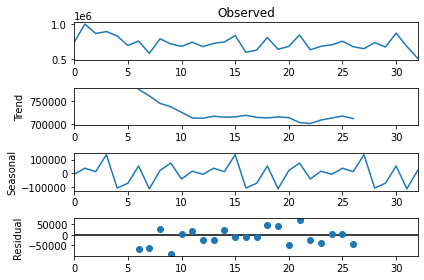

In [68]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

store_0 = time_series(resampling_data, 0)
# STL 분해
stl = seasonal_decompose(store_0.values, freq=12)
stl.plot()
plt.show()

그래프를 보면,
1. 관측된 실제 매출액
2. 추세
3. 계절성
4. 나머지 성분(Residual)로 분해한 것. 즉, '실제 관측값=추세+계절성+나머지 성분'


STL 분해의 이유:
- 매출의 전반적인 트렌드, 계절성 등을 고려해야 정확한 모델을 만들 수 있기 때문이다.


##### # R의 forecast 패키지에 있는 stlm 함수로 STL 분해를 하고 지수평활법을 통해 예측하는 코드

In [69]:
import rpy2.robjects as robjects # r 함수를 파이썬에서 사용 가능하게 변환하는 모듈
from rpy2.robjects import pandas2ri # 파이썬 자료형과 R 자료형의 호환을 도와주는 모듈

# pandas2ri를 활성화 
pandas2ri.activate()
stlm = """
    function(ts){
        library(forecast) # forecast 패키지 로드
        model = stlm(ts, s.window="periodic", method='ets') # STL 분해 후 지수평활법을 통한 예측 
        forecasted_data = forecast(model, h=3) # 이후 3개월(h=3)을 예측
        out_df = data.frame(forecasted_data$mean) # 예측값을 R의 데이터프레임으로 변환
        colnames(out_df) = c('amount') # amount라는 열로 이름을 지정
        out_df
    }
"""
ets = """
    function(ts){
        library(forecast) # forecast 패키지 로드
        model = ets(ts) # AIC가 낮은 지수평활 모델을 찾음 
        forecasted_data = forecast(model, h=3) # 이후 3개월(h=3)을 예측
        out_df = data.frame(forecasted_data$mean) # 예측값을 R의 데이터프레임으로 변환
        colnames(out_df) = c('amount') # amount라는 열로 이름을 지정
        out_df
    }
"""
# r() 함수로 r을 파이썬에서 사용 가능
stlm = robjects.r(stlm)# str 형식으로 정의된 stlm
ets = robjects.r(ets)# str 형식으로 정의된 ets
ts = robjects.r('ts')# r 자료형 time series 자료형으로 만들어주는 함수
c = robjects.r('c') # r 자료형 벡터를 만들어주는 함수

final_pred = []

for i in tqdm(resampling_data.store_id.unique()):
    store = resampling_data[resampling_data['store_id']==i]
    data_len = len(store)
    
    start_year = int(min(store['year_month'])[:4]) # 영업 시작 년도
    start_month = int(min(store['year_month'])[5:]) # 영업 시작 월
    # R의 ts 함수로 time series 데이터로 변환
    train = ts(store['amount'], start=c(start_year, start_month), frequency=12) 
    # STL 분해를 적용한 지수평활 model
    if data_len > 24:
        forecast = stlm(train)
    # 지수평활 model
    else:
        forecast = ets(train)    # 3개월 매출을 합산, final_pred에 추가
    final_pred.append(np.sum(pandas2ri.ri2py(forecast).values))

100%|██████████████████████████████████████████████████████████████████████████████| 1967/1967 [02:11<00:00, 15.00it/s]


stlm():
- STL 분해를 적용 시 최소 2시즌(24개월)보다 많은 데이터를 요구한다. 따라서 상점별 데이터 길이를 구해 24개월보다 많은 경우 STL 분해를 적용했다.
- s.window와 t.window: 계절 윈도우와 추세 윈도우를 뜻한다. 계절 및 추세 성분이 변하는 정도를 조절할 수 있으며 값이 작을수록 급격하게 변한다. 인자 값은 둘 다 홀수여야 한다. 
    - 계절 성분을 주기적으로 고정하기 위해 periodic으로 설정했다.
    - t.window: 기본값

In [70]:
submission = pd.read_csv('./submission.csv')
submission['amount3'] = final_pred
submission.to_csv('submission.csv', index=False)
submission

,store_id,amount,amount2,amount3
0,0,2.007227e+06,2.060501e+06,2.094277e+06
1,1,2.886210e+05,2.878790e+05,2.774723e+05
2,2,1.276695e+06,1.260318e+06,1.164701e+06
3,4,2.697649e+06,2.668637e+06,2.750955e+06
4,5,8.291391e+05,7.091162e+05,9.395993e+05
...,...,...,...,...
1962,2132,2.190377e+06,2.190512e+06,2.138210e+06
1963,2133,7.414846e+05,3.488475e+05,8.242583e+05
1964,2134,9.818183e+04,4.249576e+05,4.061268e+05
1965,2135,1.755864e+06,1.622992e+06,1.578473e+06


## 4.5 성능 향상을 위한 방법
성능 향상에는 크게 두 가지 방법이 있다.
- 데이터 전처리를 통한 성능 향상
- 여러 모델을 결합해서 예측을 시도하는 앙상블
- 본 팀은 데이터 전처리에서 상점 매출액이 로그 정규화와 R의 forecastHybird 패키지를 이용해 ARIMA 모델, 지수평활법, STL 분해를 적용한 지수평활법의 앙상블 예측을 진행했다.


### 4.5.1 상점 매출액의 로그 정규화

시계열 데이터에서 로그 정규화를 진행하는 이유:
- 매출액의 작은 변동을 안정화해 더 큰 트렌드를 파악하기 위함이다.


왜 로그 정규화일까? [참고](https://leebaro.tistory.com/entry/%EB%8D%B0%EC%9D%B4%ED%84%B0-%EB%B6%84%EC%84%9D-%EC%8B%9C-%EC%8B%9D%EC%97%90-%EB%A1%9C%EA%B7%B8%EB%A5%BC-%EC%B7%A8%ED%95%98%EB%8A%94-%EC%9D%B4%EC%9C%A0)
- 데이터 간 편차를 줄여서 데이터가 한쪽으로 치우치거나 몰리는 것을 방지하여 정규성을 높이고 분석(회귀분석 등)에서 정확한 값을 얻기 위함이다.
- 로그는 큰 수를 작게 만들고 복잡한 계산을 간편하게 하기 위해 사용한다. 로그를 취하는 순간 그 수는 지수가 되어버리니, 값이 작아 진다.

In [71]:
import rpy2.robjects as robjects # r 함수를 파이썬에서 사용 가능하게 변환하는 모듈
from rpy2.robjects import pandas2ri # 파이썬 자료형과 R 자료형의 호환을 도와주는 모듈
import numpy as np

# pandas2ri를 활성화 
pandas2ri.activate()

auto_arima = """
    function(ts){
        library(forecast) # forecast 패키지 로드
        d_params = ndiffs(ts) # 시계열 자료의 차분 횟수 계산
        model = auto.arima(ts, max.p=2, d=d_params) # auto.arima 모델 생성
        forecasted_data = forecast(model, h=3) # 이후 3개월(h=3)을 예측
        out_df = data.frame(forecasted_data$mean) # 예측값을 R의 데이터프레임으로 변환
        colnames(out_df) = c('amount') # amount라는 열로 이름을 지정
        out_df
    }
"""

# r() 함수로 r 자료형을 파이썬에서 사용 가능
auto_arima = robjects.r(auto_arima)
ts = robjects.r('ts')# r 자료형 time series 자료형으로 만들어주는 함수
c = robjects.r('c') # r 자료형 벡터를 만들어주는 함수
# c(): 값들을 하나의 벡터 또는 리스트로 결합하는 생성함수
log = robjects.r('log')# 로그 변환 함수
exp = robjects.r('exp')# 로그 역변환 함수

# 0번 상점 추출
store_0 = resampling_data[resampling_data['store_id']==0]
start_year = int(min(store_0['year_month'])[:4]) 
# 영업 시작 년도
start_month = int(min(store_0['year_month'])[5:]) 
# 영업 시작 월

# train, test 분리
train = store_0[store_0.index <= len(store_0)-4] # : 2018년 12월 이전 데이터
test = store_0[store_0.index > len(store_0)-4] # : 2018년 12월~2019년 2월 데이터

# R의 ts 함수로 r의 time series 자료형으로 변환
train_log = ts(log(train['amount']), start=c(start_year, start_month), frequency=12) # log 정규화 
train = ts(train['amount'], start=c(start_year, start_month), frequency=12) # log 정규화를 하지 않음

# model arima
forecast_log = auto_arima(train_log)
forecast = auto_arima(train)

# pred
pred_log = np.sum(pandas2ri.ri2py(exp(forecast_log)).values) #로그 역변환 후 3개월 합산
pred = np.sum(pandas2ri.ri2py(forecast).values) #3개월 매출을 합산

# test(2018-12~2019-02)
test = np.sum(test['amount'])

# mae
print('log-regularization mae: ', abs(test-pred_log))
print('mae:', abs(test-pred))

log-regularization mae:  2401.9664819482714
mae: 5884.674066892825


1. 0번 상점 추출하여 2018년 12월 이전 데이터는 train으로, 2018년 12월~2019년 2월 데이터는 test로 분리
2. 로그 정규화는 numpy의 log() 함수를 이용했다. 예측 후 exp() 함수로 역변환해야 한다.
    - train_log: 매출액의 로그 정규화를 진행한 데이터
    - train: 로그 정규화를 진행하지 않았음
    - 두 데이터를 자기회귀누적이동평균 모델에 적용하고 실제값test와의 차이를 비교한다.
3. 손실함수는 대회 평가척도인 MAE이다.
4. 결과를 보면 로그 정규화를 했을 때 실제값과의 차이가 더 작으므로 성능이 더 우수하다.

##### 로그 정규화를 한다고 해서 무조건 성능이 좋아지는 것은 아니다. 
- 다만, 작은 매출액 변동을 안정화하고 큰 트렌드를 더욱 더 잘 파악할 수 있을 때 성능 향상을 달성할 수 있다.
- 매출액 변동계수를 고려해 로그 정규화를 진행했다.
    - 변동계수: 표준편차를 평균으로 나눈 지표
    - 실험 결과 매출액 변동계수가 높은 상점을 로그 정규화했을 때 예측 성능이 저하하여, 매출액 변동계수가 0.3 미만인 상점만 로그 정규화를 진행해 예측했다.

##### # 가장 성능이 좋았던 지수평활법을 이용해 변동계수를 고려하여 로그 정규화를 한 후 예측값을 생성하는 코드

In [72]:
# 매출 변동 계수를 구하는 함수
def coefficient_variation(df, i):
    cv_data = df.groupby(['store_id']).amount.std()/df.groupby(['store_id']).amount.mean()
    cv = cv_data[i]
    return cv

- 매출 변동 계수는 표준편차에서 평균을 나눠 구한 지표이다. 상점별로 변동계수를 반환한다.

In [73]:
import rpy2.robjects as robjects # r 함수를 파이썬에서 사용 가능하게 변환하는 모듈
from rpy2.robjects import pandas2ri # 파이썬 자료형과 R 자료형의 호환을 도와주는 모듈
import numpy as np

# pandas2ri를 활성화 
pandas2ri.activate()

ets = """
    function(ts){
        library(forecast) # forecast 패키지 로드
        model = ets(ts) # AIC가 낮은 지수평활 모델을 찾음 
        forecasted_data = forecast(model, h=3) # 이후 3개월(h=3)을 예측
        out_df = data.frame(forecasted_data$mean) # 예측값을 R의 데이터프레임으로 변환
        colnames(out_df) = c('amount') # amount라는 열로 이름을 지정
        out_df
    }
"""

# r() 함수로 r 자료형을 파이썬에서 사용 가능
ets = robjects.r(ets)
ts = robjects.r('ts') # r 자료형 time series 자료형으로 만들어주는 함수
c = robjects.r('c') # r 자료형 벡터를 만들어주는 함수
log = robjects.r('log') # 로그 변환 함수
exp = robjects.r('exp')# 로그 역변환 함수

final_pred = []

for i in tqdm(resampling_data.store_id.unique()):
    store = resampling_data[resampling_data['store_id']==i]
    start_year = int(min(store['year_month'])[:4]) # 영업 시작 년도
    start_month = int(min(store['year_month'])[5:]) # 영업 시작 월
    
    cv = coefficient_variation(resampling_data, i)
    # 매출액 변동 계수가 0.3 미만인 경우만 log를 씌움
    if cv < 0.3:
        train_log = ts(log(store['amount']), start=c(start_year,start_month), frequency=12) 
        # ets model
        forecast_log = ets(train_log)
        final_pred.append(np.sum(pandas2ri.ri2py(exp(forecast_log)).values))
    # 매출액 변동 계수가 0.3 이상인 경우
    else:
        train = ts(store['amount'], start=c(start_year,start_month), frequency=12)
        # 지수평활법
        forecast = ets(train)
        final_pred.append(np.sum(pandas2ri.ri2py(forecast).values)) 

100%|██████████████████████████████████████████████████████████████████████████████| 1967/1967 [17:51<00:00,  1.84it/s]


- 상점별로 반복문을 통해 지수평활법을 적용한다. 
- 변동 계수를 구하는 함수를 통해 변동 계수를 구하고, 변동 계수가 0.3 미만인 상점은 로그 정규화를 진행했다.

In [74]:
submission = pd.read_csv('./submission.csv')
submission['amount4'] = final_pred
submission.to_csv('submission.csv', index=False)
submission

,store_id,amount,amount2,amount3,amount4
0,0,2.007227e+06,2.060501e+06,2.094277e+06,1.963401e+06
1,1,2.886210e+05,2.878790e+05,2.774723e+05,2.483335e+05
2,2,1.276695e+06,1.260318e+06,1.164701e+06,1.260318e+06
3,4,2.697649e+06,2.668637e+06,2.750955e+06,2.660373e+06
4,5,8.291391e+05,7.091162e+05,9.395993e+05,7.091162e+05
...,...,...,...,...,...
1962,2132,2.190377e+06,2.190512e+06,2.138210e+06,2.122653e+06
1963,2133,7.414846e+05,3.488475e+05,8.242583e+05,3.488475e+05
1964,2134,9.818183e+04,4.249576e+05,4.061268e+05,4.249576e+05
1965,2135,1.755864e+06,1.622992e+06,1.578473e+06,1.603989e+06


- 로그 정규화를 진행하지 않고 지수평활법을 사용했을 때 점수는 794,63이며,
- 로그 정규화를 진행한 점수는 793,546점이다.


- 본 대회에서 로그 정규화가 1등과 2등의 차이를 만들었다고 본 팀은 생각한다.

### 4.5.2.	파이썬에서 R 시계열 패키지 forecastHybrid를 통한 앙상블
- 여러 모델을 앙상블해서 예측하는 방법은, 가장 많은 성능 향상을 가져오는 방법이다.
- 본 팀은 자기회귀누적이동평균 모델, 지수평활법, STL 분해를 적용한 지수평활법으로 3개의 예측치를 생성한 다음, 평균값을 구해 최종 매출액을 계산했다.
- 앙상블은 여러 모델을 결합해서 예측하는 것으로 과적합을 방지하는 효과가 있다. 또한 개별 모델의 성능이 잘 안 나올 때 앙상블을 이용하면 성능 향상을 이룰 수 있다.
- R의 forecastHybridModel 패키지는 시계열 모델에 대한 앙상블의 진입벽을 낮추었다.

In [75]:
import rpy2.robjects as robjects # r 함수를 파이썬에서 사용 가능하게 변환하는 모듈
from rpy2.robjects import pandas2ri # 파이썬 자료형과 R 자료형의 호환을 도와주는 모듈
import numpy as np

# pandas2ri를 활성화 
pandas2ri.activate()

hybridModel = """
    function(ts){
        library(forecast)
        library(forecastHybrid)
        d_params=ndiffs(ts)
        hb_mdl<-hybridModel(ts, models="aes", # auto_arima, ets, stlm
                        a.arg=list(max.p=2, d=d_params), # auto_arima parameter
                        weight="equal") # 가중치를 동일하게 줌(평균)
        forecasted_data<-forecast(hb_mdl, h=3) # 이후 3개월(h=3)을 예측
        outdf<-data.frame(forecasted_data$mean)
        colnames(outdf)<-c('amount')
        outdf
    }
""" 

# r() 함수로 r 자료형을 파이썬에서 사용 가능
hybridModel = robjects.r(hybridModel)
ts = robjects.r('ts') # r 자료형 time series 자료형으로 만들어주는 함수
c = robjects.r('c') # r 자료형 벡터를 만들어주는 함수
log = robjects.r('log') # 로그 변환 함수
exp = robjects.r('exp')# 로그 역변환 함수

final_pred = []

for i in tqdm(resampling_data.store_id.unique()):
    store = resampling_data[resampling_data['store_id']==i]
    start_year = int(min(store['year_month'])[:4]) # 영업 시작 년도
    start_month = int(min(store['year_month'])[5:]) # 영업 시작 월
    
    cv = coefficient_variation(resampling_data, i)
    # 매출액 변동 계수가 0.3 미만인 경우만 log를 씌움
    if cv < 0.3:
        train_log = ts(log(store['amount']), start=c(start_year,start_month), frequency=12) 
        # 앙상블 예측
        forecast_log = hybridModel(train_log)
        final_pred.append(np.sum(pandas2ri.ri2py(exp(forecast_log)).values)) 
    # 매출액 변동 계수가 0.3 이상인 경우
    else:
        train = ts(store['amount'], start=c(start_year,start_month), frequency=12)
        # 앙상블 예측
        forecast = hybridModel(train)
        final_pred.append(np.sum(pandas2ri.ri2py(forecast).values))

100%|██████████████████████████████████████████████████████████████████████████████| 1967/1967 [20:49<00:00,  1.57it/s]


- hybridModel(): 
- 첫번째 인자로 R의 time series 자료형을 받고
- models에 넘겨준 인자 aes는 forecast 패키지에 있는 함수 auto.arima, ets, stlm의 압글자를 따서 합친 것이다. 즉, 앙상블 할 모델을 설정하는 인자다.
- 따라서 자기회귀누적이동평균 모델, 지수평활법, STL 분해를 적용한 지수평활법을 이용해 앙상블을 진행할 때 인자로 aes를 설정하면 된다.
- a.arg: auto.arima의 파라미터를 설정한다.
- weight: equal은 가중치를 동일하게 준다.(평균)


- 로그 정규화는 cv(변동 계수)가 0.3 이하일 때 진행했다.
- 최종 예측치를 hybridModel 함수로 생성했다.

In [76]:
submission = pd.read_csv('./submission.csv')
submission['amount5'] = final_pred
submission.to_csv('submission.csv', index=False)
submission

,store_id,amount,amount2,amount3,amount4,amount5
0,0,2.007227e+06,2.060501e+06,2.094277e+06,1.963401e+06,1.996290e+06
1,1,2.886210e+05,2.878790e+05,2.774723e+05,2.483335e+05,2.653045e+05
2,2,1.276695e+06,1.260318e+06,1.164701e+06,1.260318e+06,1.240681e+06
3,4,2.697649e+06,2.668637e+06,2.750955e+06,2.660373e+06,2.695279e+06
4,5,8.291391e+05,7.091162e+05,9.395993e+05,7.091162e+05,8.240620e+05
...,...,...,...,...,...,...
1962,2132,2.190377e+06,2.190512e+06,2.138210e+06,2.122653e+06,2.115933e+06
1963,2133,7.414846e+05,3.488475e+05,8.242583e+05,3.488475e+05,6.311052e+05
1964,2134,9.818183e+04,4.249576e+05,4.061268e+05,4.249576e+05,3.021292e+05
1965,2135,1.755864e+06,1.622992e+06,1.578473e+06,1.603989e+06,1.626442e+06


|기법|점수|
|:---:|:---:|
|자기회귀누적이동평균(ARIMA) 모델|844,383점|
|지수평활법|794,263점|
|STL분해를 적용한 지수평활법|869,178점|
|로그정규화를 진행한 지수평활법|793,536점|
|ARIMA, 지수평활법, STL분해를 적용한 지수평활법을 이용한 앙상블|741,880점|

- 자기회귀누적이동평균 모델, 지수평활법, STL 분해를 적용한 지수평활법을 이용해 앙상블 예측하여 741,880점 
- 기존 로그 정규화를 진행한 지수평활법 점수는 793,536점


앙상블은 성능 향상 효과가 가장 좋은 기법이다.

### 4.6 정리
- 경진 대회마다 문제가 다르므로 문제를 정의하고 사전 도메인을 조사하는 과정이 가장 어렵다.
- 대회에 참가하기 전에 경진대회와 관련된 도메인을 공부할 것을 추천한다.
- 관련 논문 리뷰나 관련 분야 전문가 인터뷰 등을 통해 사전 도메인을 알고 나면 데이터 전처리와 파생 변수 생성, 모델을 적용하는 과정이 훨씬 수월해질 것이다.

# # 리뷰어의 정리:

1. __문제 정의__
- 데이콘 코드 리뷰를 준비하면서 가장 크게 느꼈던 것은 사전 조사, 즉 도메인 조사가 분석의 방향뿐 아니라 데이터 전처리와 모델링 선택에 큰 영향을 주는 핵심적인 요인이었음을 알 수 있었다.
- 특히 도메인 조사 및 EDA 분석 중 세분화된 파생 변수들의 세밀함과 정교함은 어디까지 고려해야 하는지 가이드 라인으로 확인해 볼 수 있었던 시간이었다.

|코드|설명|
|:---:|:---|
|os.chdir()| 설정하고 싶은 작업 경로를 인자로 넘겨주면 작업 디렉터리를 변경할 수 있다.|
|pd.read_csv()| csv 데이터 불러오기|
|data.shape| 데이터 크기 확인|
|data.info()| 데이터 알아보기|
|data.describe()| 데이터 요약|
|data.corr()| 상관관계|

2. __데이터 전처리__


1) 이상치(매출액이 0 미만인 음수)와 결측치(범주형 데이터) 처리한다.
- 특히 매출액이 0 미만인 것은 환불이라는 의미인데, 이전 구매 이력을 제거하지 않으면 매출액을 집계할 때 과대 계상 되기에, 음과 양의 매출액 절대값이 같은 거래 중 최근 거래를 찾아 해당 데이터를 제거해야 한다.


|코드|설명|
|:---:|:---|
|data.isnull()| 메소드를 이용해 결측치가 있는지 확인|
|data.isnull().sum()| 결측치 합계|
|plt.bar(data.columns, data.isnull().sum())| 결측치 합계 바 그래프|
|data.drop(['column'], axis=1) | 열 기준으로 drop(제거)|
|data.dtype| 데이터의 타입 알아보기 (결과 중 'O': (Python) objects을 뜻함)|
|pd.to_datetime()| datetime64 타입으로 바꿈|
|df.store_id.unique()| 유일한 값 찾기|
|tqdm()| 진행 바로 어느 정도까지 했는지 확인|
|to_records()| 넘파이 레코드 배열로 변환|
|pd.concat(df)| df를 인자로 받고, 데이터프레임을 이어 붙여주는 함수. default는 행 기준이며, 인덱스를 그대로 가져온다(인덱스 재배열 및 수정 옵션: ignore_index=True)|

2) 시간 간격을 넓게 재조정해 데이터 샘플 수를 줄여 불확실성을 줄여야 한다.


|코드|설명|
|:---:|:---|
|df.str.slice()| 인덱스 사이 값 반환|
|df.drop_duplicates()| 컬럼의 중복값을 제거함|
|df.reset_index()| 전처리 과정을 거치게 되면 인덱스가 뒤죽박죽인 경우가 많은데, 이럴 때 인덱스를 다시 처음부터 재배열 해주는 유용한 함수|

    
3) 시계열 데이터의 정상성: 평균과 분산 같은 통계적 특성이 시간에 대해 일정한 성질이다.


|코드|설명|
|:---:|:---|
|date_range()| 시간 변수의 날짜 지정 범위를 생성한다. 범위를 지정하고 freq 옵션으로 빈도(frequency)를 설정한다. BM: 월의 공휴일이 아닌 마지막 날짜|    

- __데이터 전처리 정리__
    1. 데이터의 불필요한 노이즈를 찾아 제거
    2. 다운 샘플링으로 시계열 모델의 불확실성을 줄임
    3. 상점별 날짜 지정 범위를 생성하고 시리즈 객체로 변환 후 시계열 모델이 무리 없이 작동하게 준비함

3. __탐색적 데이터 분석__


    1) 상점별 매출 특성: 계절성, 추세, 휴폐업
- 상점 데이터를 time_series(data, id)로 시리즈 객체로 변환시키고, 
- 그래프 그려 시계열의 계절성과 추세, 휴폐업을 확인한다.
- 시계열 데이터는 그래프를 그려 그 특성을 확인한다. 


    2) 시계열 데이터의 정상성, ADF-TEST 등
- 정상성: 평균과 분산 같은 통계적 특성이 시간에 대해 일정한 성질
- ADF-TEST:시계열 데이터의 정상성 여부를 판단, 정상성을 가지지 않으면 차분을 통해 평균을 일정하게 만들어줌
    - 차분: 비정상 시계열을 평균이 일정한 정상 시계열로 바꾸는 기법

        
- ADFTest(): 비정상적인 평균 확인
- should_diff(): 인자는 시리즈 객체, p-value 값과 차분의 필요 여부를 True나 False로 반환

4. 모델 구축과 검증


1) forecast
- rpy2.robjects: r 함수를 파이썬에서 실행할 수 있게 해주는 모듈
    - robjects.r(): ts 함수와 c 함수를 사용할 수 있게 함
    - ts(): 시계열 자료형을 생성해주는 함수
    - c(): 벡터를 생성해주는 함수
- pandas2ri: 파이썬 자료형과 R 자료형의 호환을 도와주는 모듈
    - pandas2ri.activate(): pandas2ri를 활성화 

2) 모델 선택과 검증:
- 1. ARIMA: AR, MA, 차분, 백색잡음 등
- 2. 지수평활법: 단순 지수평활법, 잔차, 홀트의 선형추세 기법 등
- 3. STL 분해 적용한 지수평활법: STL, 시계열 분해 등

5. 성능 향상을 위한 방법


1) 로그 정규화
- df.groupby(['col']).amount.std()
- df.groupby(['col']).amount.mean()


2) 위 1,2,3 모델을 합친 앙상블

6. __정리__
- 프로젝트가 어떤 식으로 진행되는지 간소하게나마 간접적으로 경험할 수 있었다.
- EDA 분석 시 확인한 상점별 특성(계절성, 특성, 휴폐업)을 살린 모델링은 아니라서 아쉬웠다. 해당 코드 작성 후 모델 생성을 해보고 싶다.